In [182]:
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(stringr))
library(hise)
library(plyr)
library(purrr)
library(vegan)
#library(arrow)
library(rstatix)
library(parallel)
library(ggpubr)
library(ComplexHeatmap)
library(compositions)
library(ggsci)

ERROR: Error in library(compositions): there is no package called ‘compositions’


In [2]:
colors = c('#FDC086','#FFFF99','#F0027F','#BF5B17','#666666',
          '#1B9E77','#D95F02','#7570B3','#E7298A','#66A61E','#E6AB02','#A6761D','#666666',
          '#A6CEE3','#1F78B4','#B2DF8A','#33A02C','#FB9A99','#E31A1C','#FDBF6F','#FF7F00',
          '#CAB2D6','#6A3D9A','#FFFF99','#B15928','#FBB4AE','#B3CDE3','#CCEBC5','#DECBE4',
          '#FED9A6','#FFFFCC','#E5D8BD','#FDDAEC','#F2F2F2','#B3E2CD','#FDCDAC','#CBD5E8',
          '#F4CAE4','#E6F5C9','#FFF2AE','#F1E2CC','#CCCCCC','#E41A1C','#377EB8','#4DAF4A',
          '#984EA3','#FF7F00','#FFFF33','#A65628','#F781BF','#999999','#66C2A5','#FC8D62',
          '#8DA0CB','#E78AC3','#A6D854','#FFD92F','#E5C494','#B3B3B3','#8DD3C7','#FFFFB3',
          '#BEBADA','#FB8072','#80B1D3','#FDB462','#B3DE69','#FCCDE5','#D9D9D9','#BC80BD',
          '#CCEBC5','#FFED6F')

# Reading the file

In [3]:
# Read the CSV file into a data frame
myeloid_df <- read.csv('/home/jupyter/Myeloid_cells/files/Parquet_files/AIFI_Reference_processed.csv')


In [4]:
#remove UPI from the cohort
myeloid_df <- myeloid_df %>% filter(cohort.cohortGuid != 'UP1')

In [5]:
unique(myeloid_df$AIFI_L3)

[1] "CD8 MAIT"                            
 [2] "CM CD4 T cell"                       
 [3] "GZMB- CD27+ EM CD4 T cell"           
 [4] "Core naive CD4 T cell"               
 [5] "Proliferating NK cell"               
 [6] "Core naive CD8 T cell "              
 [7] "GZMB- CD27- EM CD4 T cell"           
 [8] "GZMK+ CD27+ EM CD8 T cell"           
 [9] "Adaptive NK cell"                    
[10] "SOX4+ naive CD8 T cell"              
[11] "Proliferating T cell"                
[12] "CM CD8 T cell"                       
[13] "DN T cell"                           
[14] "KLRF1- GZMB+ CD27- EM CD8 T cell"    
[15] "GZMK+ Vd2 gdT"                       
[16] "GZMB+ Vd2 gdT"                       
[17] "SOX4+ naive CD4 T cell"              
[18] "GZMK- CD27+ EM CD8 T cell"           
[19] "ISG+ memory CD4 T cell"              
[20] "Naive CD4 Treg"                      
[21] "KLRF1- GZMB+ CD27- memory CD4 T cell"
[22] "KLRF1+ GZMB+ CD27- EM CD8 T cell"    
[23] "ISG+ naive CD4 T cell"               
[24] "Naive Vd1 gdT"                       
[25] "Memory CD4 Treg"                     
[26] "CD8aa"                               
[27] "KLRB1+ memory CD4 Treg"              
[28] "Memory CD8 Treg"                     
[29] "GZMK+ memory CD4 Treg"               
[30] "ISG+ naive CD8 T cell"               
[31] "CD4 MAIT"                            
[32] "ISG+ memory CD8 T cell"              
[33] "KLRF1+ effector Vd1 gdT"             
[34] "ISG+ MAIT"                           
[35] "SOX4+ Vd1 gdT"                       
[36] "KLRB1+ memory CD8 Treg"              
[37] "KLRF1- effector Vd1 gdT"             
[38] "GZMK+ CD56dim NK cell"               
[39] "GZMK- CD56dim NK cell"               
[40] "CD56bright NK cell"                  
[41] "ISG+ CD56dim NK cell"                
[42] "ILC"                                 
[43] "Core CD14 monocyte"                  
[44] "pDC"                                 
[45] "Core CD16 monocyte"                  
[46] "CD14+ cDC2"                          
[47] "ISG+ CD16 monocyte"                  
[48] "Intermediate monocyte"               
[49] "C1Q+ CD16 monocyte"                  
[50] "ISG+ CD14 monocyte"                  
[51] "HLA-DRhi cDC2"                       
[52] "IL1B+ CD14 monocyte"                 
[53] "ISG+ cDC2"                           
[54] "cDC1"                                
[55] "ASDC"                                
[56] "CMP cell"                            
[57] "Platelet"                            
[58] "Erythrocyte"                         
[59] "CLP cell"                            
[60] "BaEoMaP cell"                        
[61] "Core memory B cell"                  
[62] "Core naive B cell"                   
[63] "CD27+ effector B cell"               
[64] "Transitional B cell"                 
[65] "ISG+ naive B cell"                   
[66] "Plasma cell"                         
[67] "Early memory B cell"                 
[68] "CD27- effector B cell"               
[69] "Type 2 polarized memory B cell"      
[70] "CD95 memory B cell"                  
[71] "Activated memory B cell"

In [6]:
rownames(myeloid_df)<-myeloid_df$cell_uuid

In [ ]:
#length(unique(myeloid_df$subject.subjectGuid))

In [ ]:
#unique(myeloid_df$AIFI_L1)

In [ ]:
#head(myeloid_df)

# CLR Transform


In [7]:
clr_transform <- function(x) {
  if (length(x) == 0) {
    return(NA)  # return NA for empty vectors
  }
  geom_mean <- exp(mean(log(x)))
  return(log(x / geom_mean))
}

# Comparsion within toal PBMCs (Percentage and Percentage CLR)

In [274]:
## Percentage of total

result <- myeloid_df %>%
  dplyr::group_by(AIFI_L3, subject.subjectGuid) %>%               
  dplyr::summarise(count = n()) %>%                  # Count occurrences
  dplyr::group_by(subject.subjectGuid) %>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(subject.subjectGuid) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% # Group again by subjectGuid for CLR# Calculate percentage
  dplyr::ungroup()

head(result)
#sum(result$subject.subjectGuid)

`summarise()` has grouped output by 'AIFI_L3'. You can override using the
`.groups` argument.


AIFI_L3 subject.subjectGuid count percentage percentage_clr
1 ASDC    BR1001              6     0.03236770 -2.232976     
2 ASDC    BR1002              5     0.02637409 -2.242500     
3 ASDC    BR1003              4     0.02094680 -2.763896     
4 ASDC    BR1004              3     0.01710571 -2.626914     
5 ASDC    BR1005              5     0.02809620 -1.943233     
6 ASDC    BR1006              4     0.02300966 -2.337902

In [ ]:
sum(result$percentage)

In [ ]:
result %>% filter(subject.subjectGuid == "BR1001")

In [275]:
result %>% filter(subject.subjectGuid == "BR1001") %>% 
      select(percentage) %>%
      pull() %>% 
      sum()

[1] 100

In [276]:
result<-left_join(result,unique(myeloid_df[c('cohort.cohortGuid','subject.subjectGuid','subject.biologicalSex','CMV.IgG.Serology.Result.Interpretation')]),by=c('subject.subjectGuid'))

In [ ]:
head(result)
result %>% filter(subject.subjectGuid == "BR1001") %>% 
      select(percentage) %>%
      pull() %>% 
      sum()

Adding missing grouping variables: `AIFI_L3`,
`CMV.IgG.Serology.Result.Interpretation`


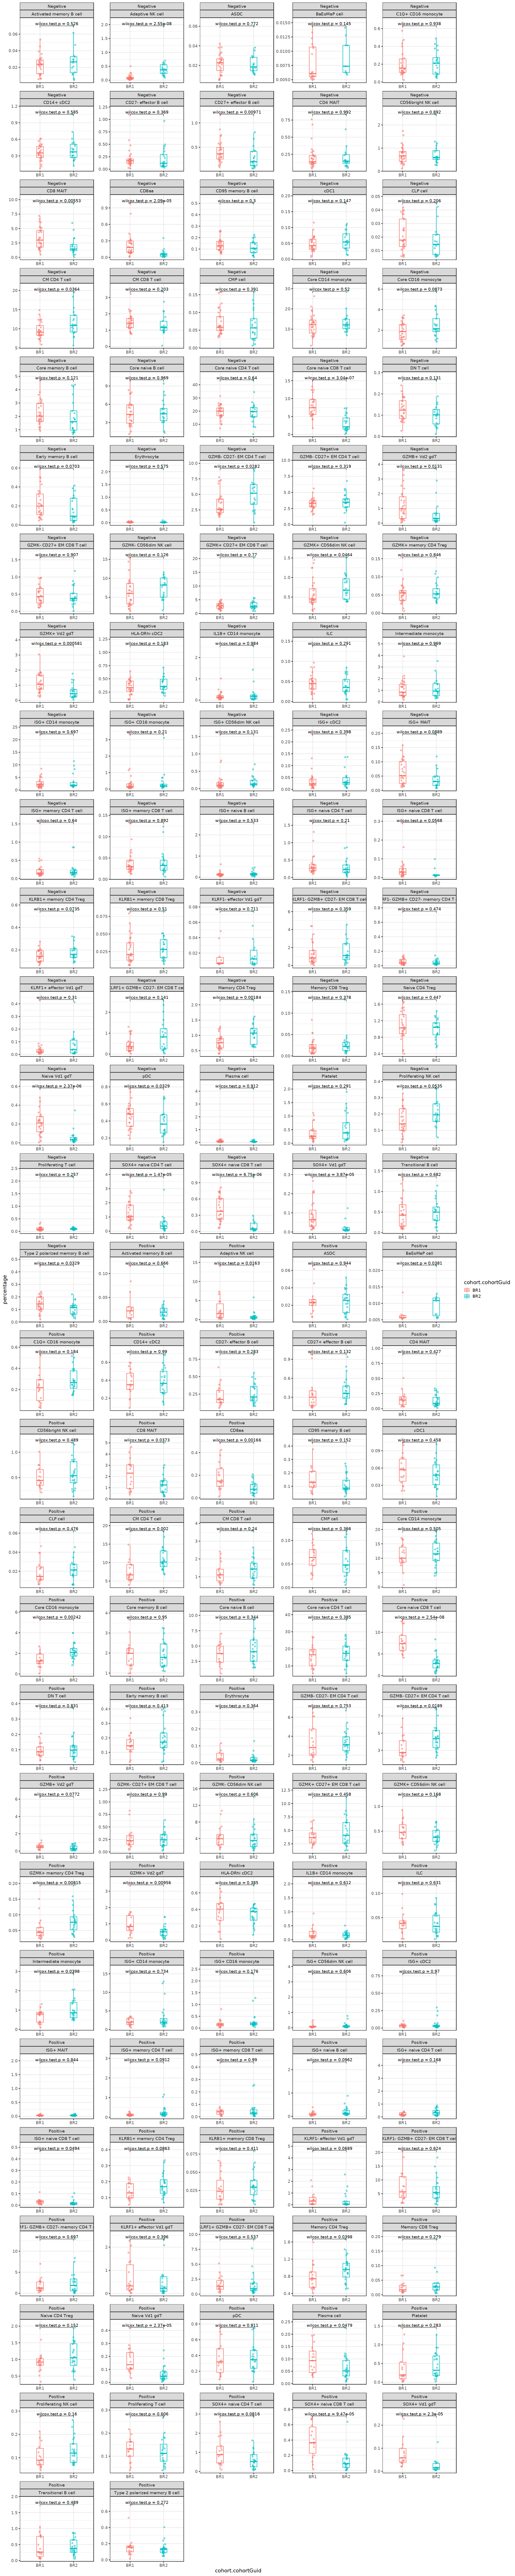

In [11]:
##percentage comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 100)

stat.test <- result %>% select(percentage,AIFI_L3,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3,CMV.IgG.Serology.Result.Interpretation) %>%
  wilcox_test(percentage ~ cohort.cohortGuid)


max_values<-result %>%
  group_by(AIFI_L3,CMV.IgG.Serology.Result.Interpretation) %>%
  slice(which.max(percentage))%>% select(percentage) %>% pull()


stat.test$y.position<-max_values


my_plot <- ggplot(result, aes(cohort.cohortGuid, percentage,color=cohort.cohortGuid)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~CMV.IgG.Serology.Result.Interpretation+AIFI_L3,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

my_plot

In [ ]:
##percentage-CLR comparsion by CMV (haven't executed)

options(repr.plot.width = 18, repr.plot.height = 12)

stat.test <- result %>% select(percentage_clr,celltypes,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(celltypes,CMV.IgG.Serology.Result.Interpretation) %>%
  wilcox_test(percentage_clr ~ cohort.cohortGuid)

max_values<-result %>%
  group_by(celltypes,CMV.IgG.Serology.Result.Interpretation) %>%
  slice(which.max(percentage_clr))%>% select(percentage_clr) %>% pull()+1
stat.test$y.position<-max_values
ggplot(result , aes(cohort.cohortGuid, percentage_clr,color=cohort.cohortGuid)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+scale_color_d3()+
facet_wrap(~CMV.IgG.Serology.Result.Interpretation+celltypes,scale="free",ncol=7)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

In [ ]:
##percentage-CLR comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 100)

stat.test <- result %>% select(percentage_clr,AIFI_L3,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  wilcox_test(percentage_clr ~ CMV.IgG.Serology.Result.Interpretation)


max_values<-result %>%
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  slice(which.max(percentage_clr))%>% select(percentage_clr) %>% pull()


stat.test$y.position<-max_values


my_plot <- ggplot(result, aes(CMV.IgG.Serology.Result.Interpretation, percentage_clr,color=CMV.IgG.Serology.Result.Interpretation)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~cohort.cohortGuid+AIFI_L3,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

my_plot

In [ ]:
###### GLobal Plot #######

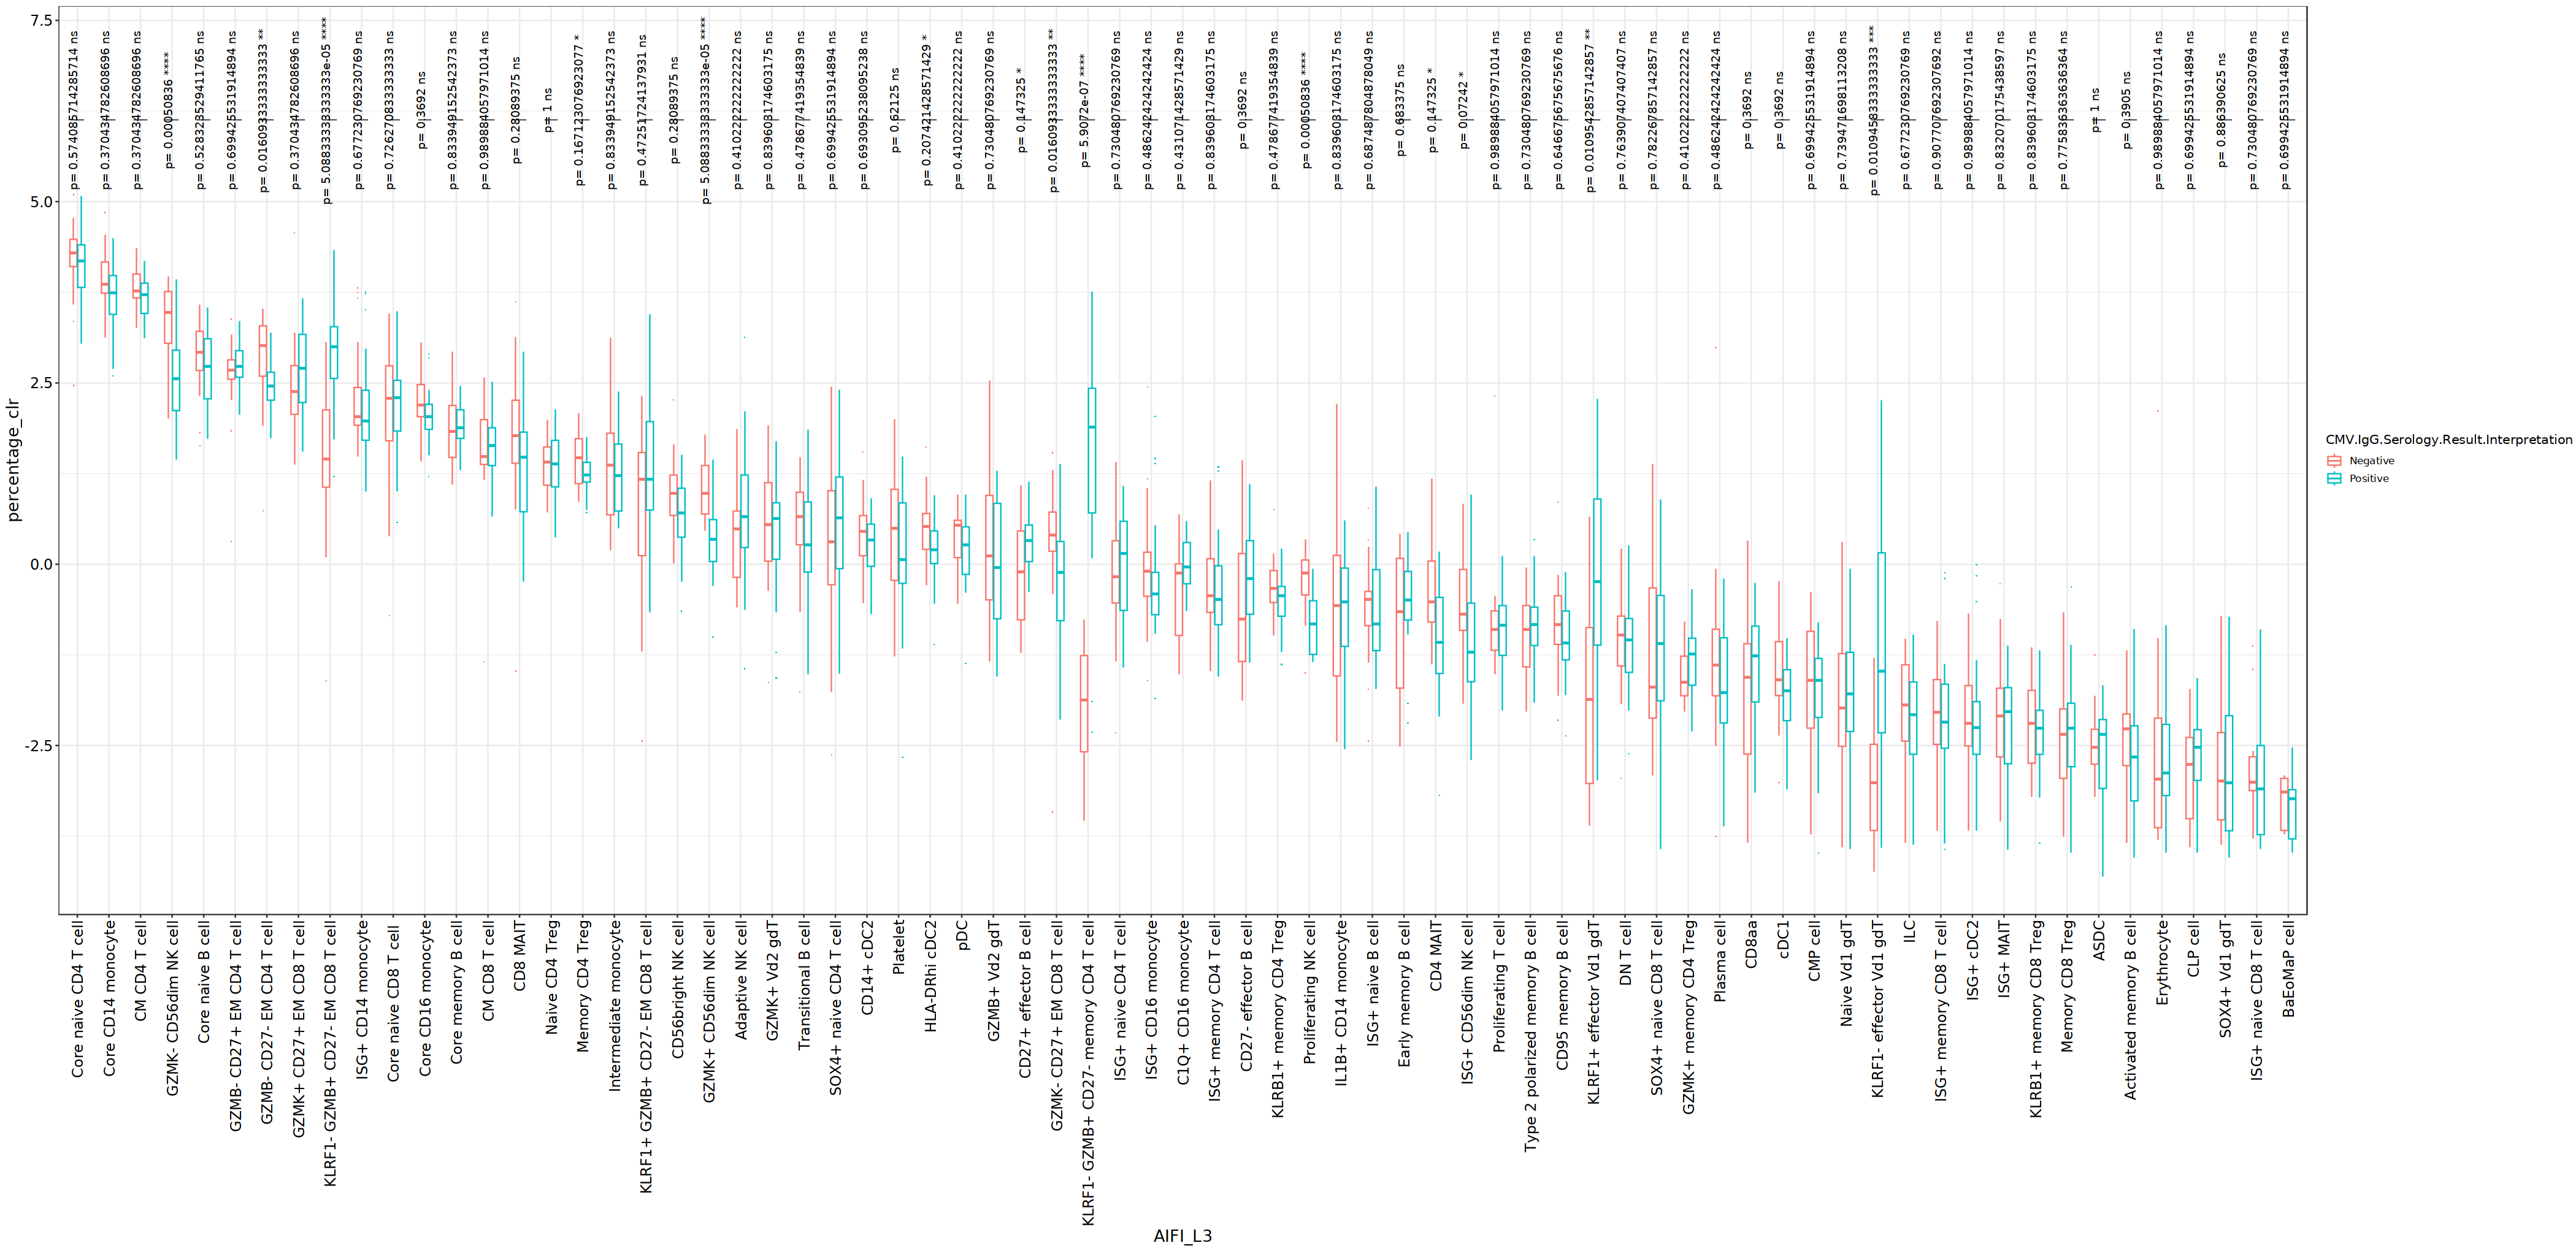

In [309]:
# Percentage comparing CMV- change the input variable

result_cohort <- result[result$cohort.cohortGuid == 'BR2', ]

stat_test_2 <- result_cohort %>%
  select(percentage_clr, AIFI_L3, CMV.IgG.Serology.Result.Interpretation, cohort.cohortGuid) %>%
  unique(.) %>%
  group_by(AIFI_L3, cohort.cohortGuid) %>%
  wilcox_test(percentage_clr ~ CMV.IgG.Serology.Result.Interpretation) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()


# Store adjusted p-values in a new column in the original dataframe
#result <- result %>%
 # left_join(stat_test_1, by = c("AIFI_L3", "cohort.cohortGuid"))

#only select one cohort at a time


# Create the plot
options(repr.plot.width = 35, repr.plot.height = 17)
p4 <- ggplot(result_cohort, aes(x = reorder(AIFI_L3, desc(percentage_clr)) , y = percentage_clr, color = CMV.IgG.Serology.Result.Interpretation)) +
  geom_boxplot(width = .5, outlier.shape = '.') +
  scale_x_discrete(name ="AIFI_L3", guide = guide_axis(angle = 90)) +
  theme_bw(base_size = 12) +
  geom_pwc(
    aes(group = CMV.IgG.Serology.Result.Interpretation),
    tip.length = 0, p.adjust.method = "BH",
    method = "wilcox_test", label ="p= {p.adj} {p.signif}", angle = 90, hide.ns = FALSE  # or "panel"
  ) +
  #facet_grid(cohort.cohortGuid ~ ., scales = "free_y", space = "free_y") +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15))) +
  theme(axis.text.x = element_text(size = 14, color = "black", angle = 90, hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(size = 14, color = "black"),
        axis.title.x = element_text(size = 16, color = "black"),
        axis.title.y = element_text(size = 16, color = "black"))

# Display the plot
print(p4)


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


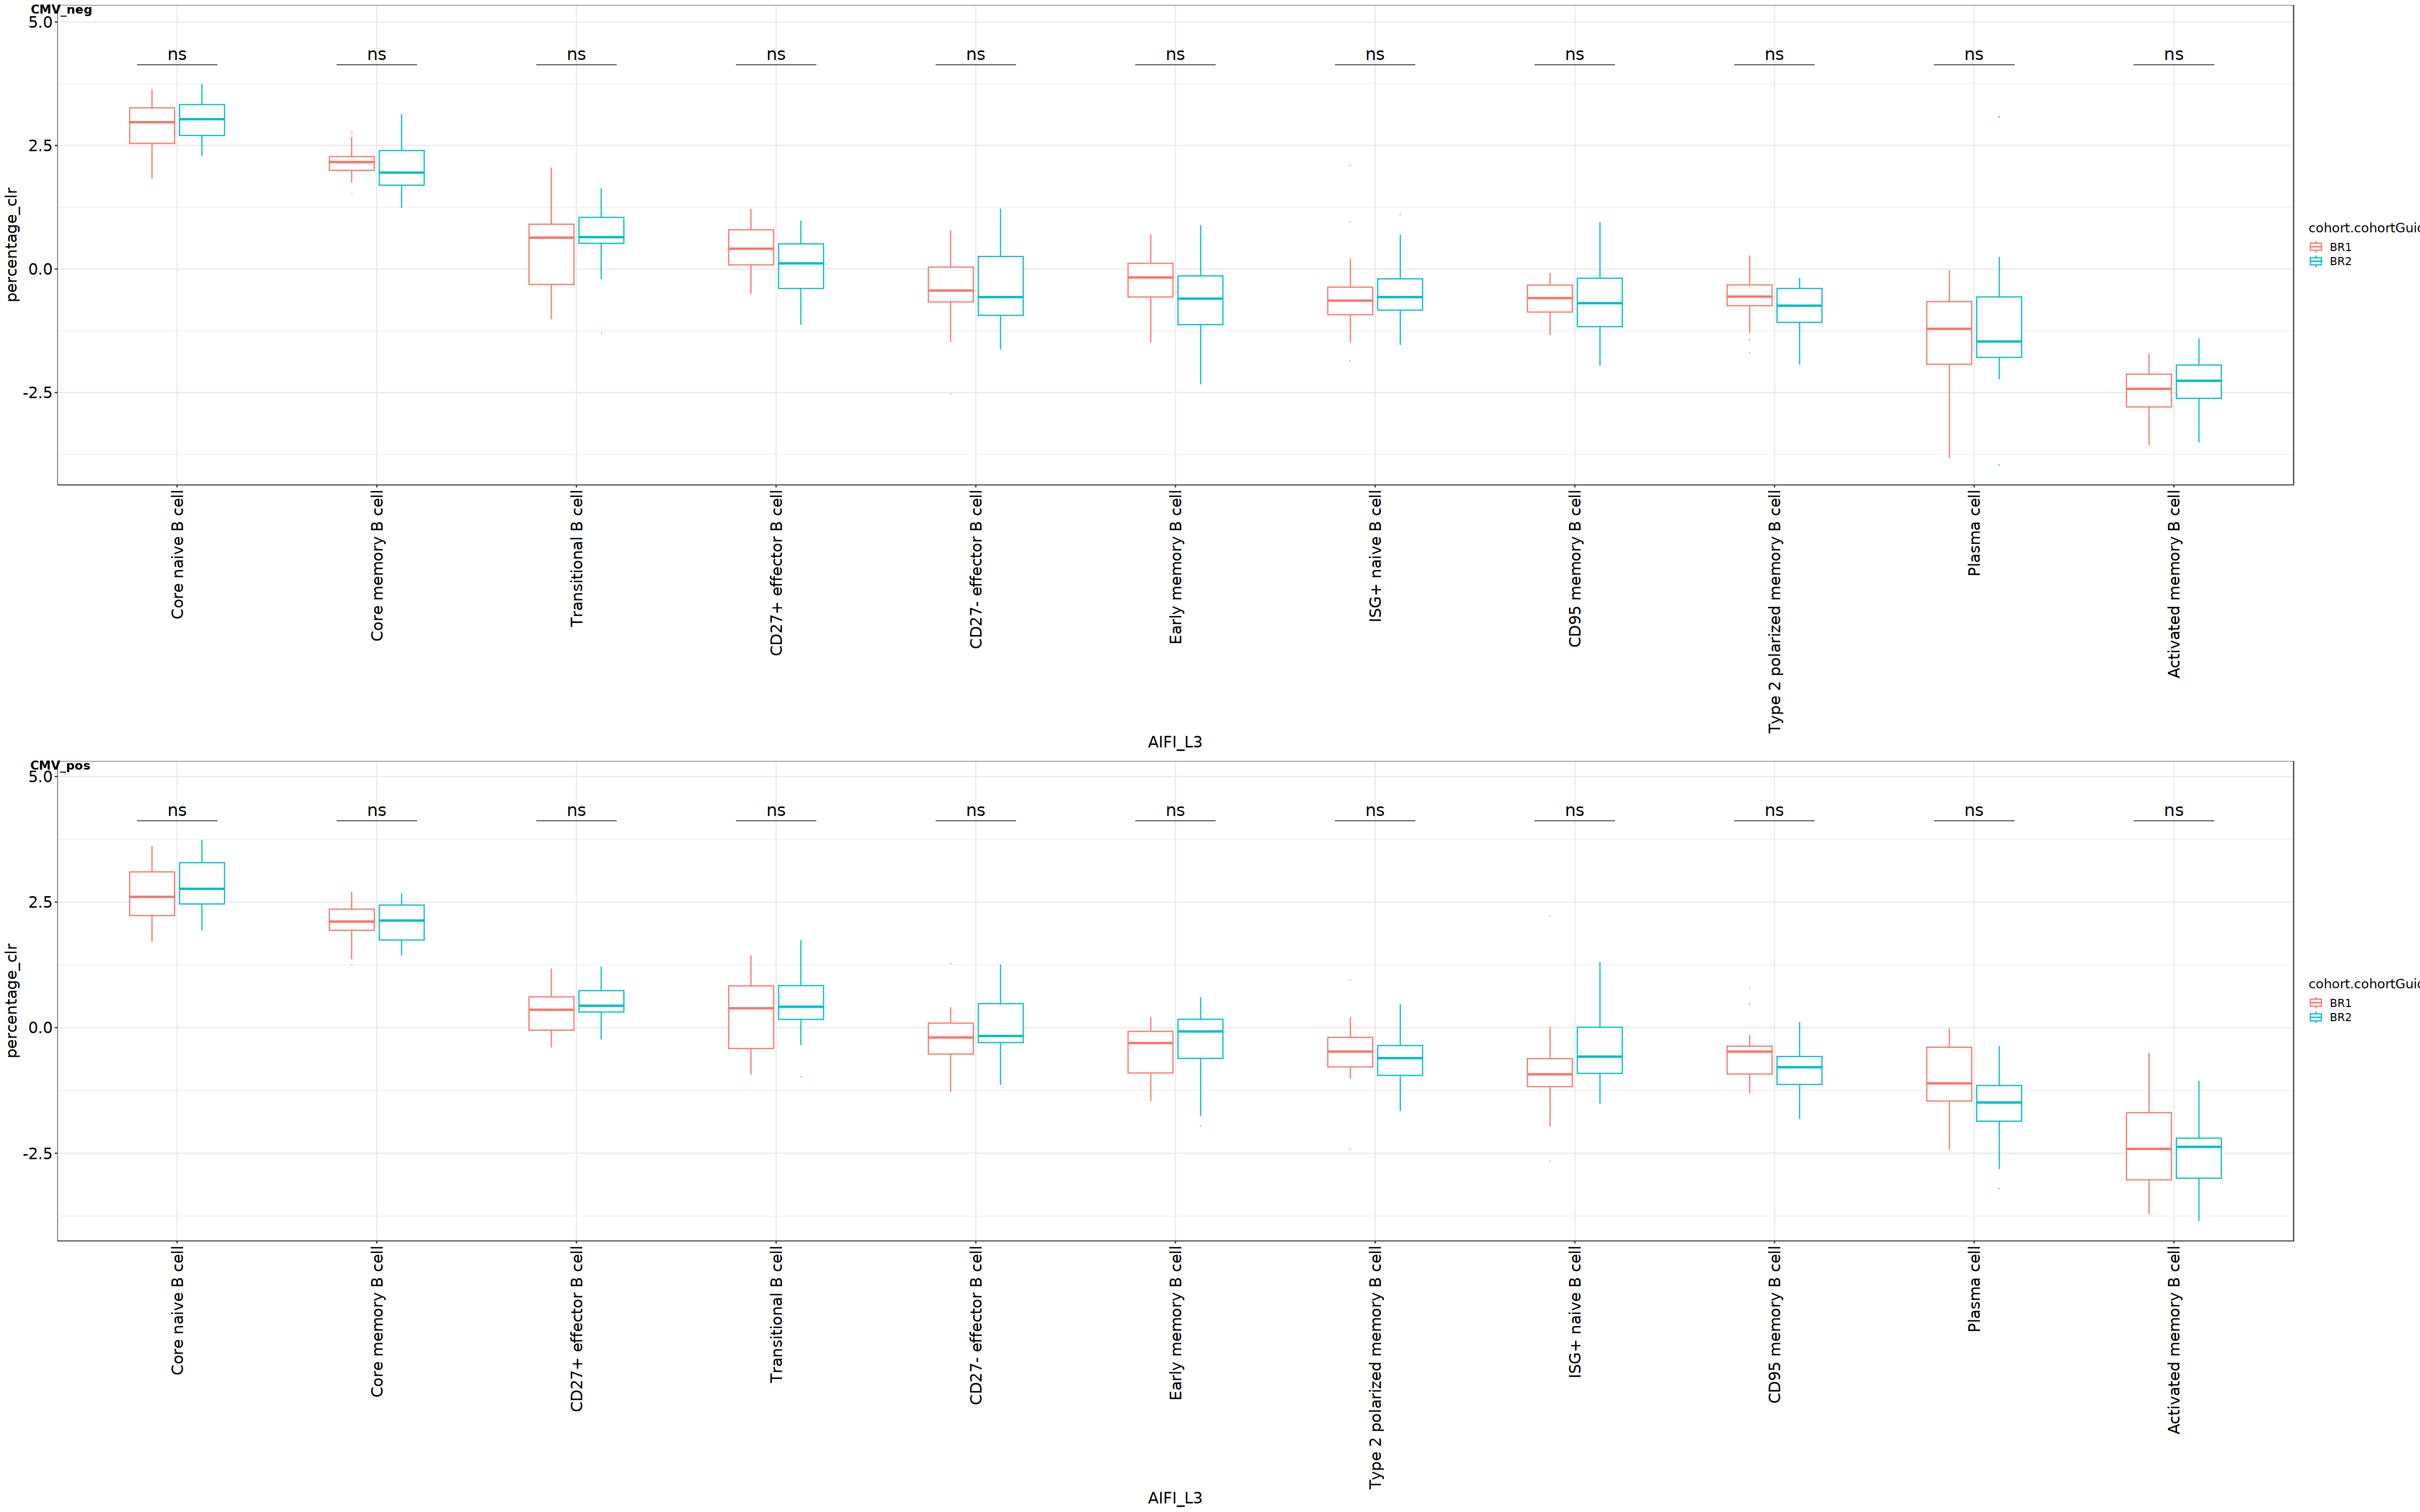

In [73]:
# Percentage- CLR comparing Age across CMV


####################. Negative CMV ####################
result_cohort <- result[result$cohort.cohortGuid == 'BR1', ]
#result_cohort <- result_Bcell[result_Bcell$CMV.IgG.Serology.Result.Interpretation == 'Positive', ]

stat_test<- result_cohort %>%
  select(percentage_clr, AIFI_L3, cohort.cohortGuid, CMV.IgG.Serology.Result.Interpretation) %>%
  unique(.) %>%
  group_by(AIFI_L3, cohort.cohortGuid) %>%
  wilcox_test(percentage_clr ~ CMV.IgG.Serology.Result.Interpretation) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()


## Create the plot
#options(repr.plot.width = 35, repr.plot.height = 17)
p1 <- ggplot(result_cohort, aes(x = reorder(AIFI_L3, desc(percentage_clr)) , y = percentage_clr, color = CMV.IgG.Serology.Result.Interpretation)) +
  geom_boxplot(width = .5, outlier.shape = '.') +
  scale_x_discrete(name ="AIFI_L3", guide = guide_axis(angle = 90)) +
  theme_bw(base_size = 12) +
  geom_pwc(
    aes(group = CMV.IgG.Serology.Result.Interpretation),
    tip.length = 0, p.adjust.method = "BH",
    method = "wilcox_test", label ="{p.adj.signif}", angle = 0, hide.ns = FALSE, label.size=7  # or "panel"
  ) +
  #facet_grid(cohort.cohortGuid ~ ., scales = "free_y", space = "free_y") +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15))) +
  theme(axis.text.x = element_text(size = 18, color = "black", angle = 90, hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(size = 18, color = "black"),
        axis.title.x = element_text(size = 18, color = "black"),
        axis.title.y = element_text(size = 18, color = "black"),
       legend.text = element_text(size = 13, color = "black"),  # Adjust the font size of legend text
        legend.title = element_text(size = 15, color = "black"))

# Display the plot
#print(p4)

####################. Positive CMV ####################
#result_cohort <- result_Bcell[result_Bcell$CMV.IgG.Serology.Result.Interpretation == 'Negative', ]
result_cohort <- resultresult$cohort.cohortGuid == 'BR2', ]

stat_test<- result_cohort %>%
  select(percentage_clr, AIFI_L3, cohort.cohortGuid, CMV.IgG.Serology.Result.Interpretation) %>%
  unique(.) %>%
  group_by(AIFI_L3, CMV.IgG.Serology.Result.Interpretation) %>%
  wilcox_test(percentage_clr ~ cohort.cohortGuid) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()


## Create the plot
#options(repr.plot.width = 35, repr.plot.height = 17)
p2 <- ggplot(result_cohort, aes(x = reorder(AIFI_L3, desc(percentage_clr)) , y = percentage_clr, color = CMV.IgG.Serology.Result.Interpretation)) +
  geom_boxplot(width = .5, outlier.shape = '.') +
  scale_x_discrete(name ="AIFI_L3", guide = guide_axis(angle = 90)) +
  theme_bw(base_size = 12) +
  geom_pwc(
    aes(group = CMV.IgG.Serology.Result.Interpretation),
    tip.length = 0, p.adjust.method = "BH",
    method = "wilcox_test", label ="{p.adj.signif}", angle = 0, hide.ns = FALSE, label.size =7  # or "panel"
  ) +
  #facet_grid(cohort.cohortGuid ~ ., scales = "free_y", space = "free_y") +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15))) +
   scale_y_continuous(expand = expansion(mult = c(0.05, 0.15))) +
  theme(axis.text.x = element_text(size = 18, color = "black", angle = 90, hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(size = 18, color = "black"),
        axis.title.x = element_text(size = 18, color = "black"),
        axis.title.y = element_text(size = 18, color = "black"),
       legend.text = element_text(size = 13, color = "black"),  # Adjust the font size of legend text
        legend.title = element_text(size = 15, color = "black"))

# Display the plot
#print(p4)

#Combine Plot
library(cowplot)
options(repr.plot.width = 40, repr.plot.height = 25)
# Combine two plots vertically
combined_plot <- plot_grid(p1, p2, labels = c("CMV_neg", "CMV_pos"), ncol =1)

combined_plot

# Comparsion within B cells(Percentage and Percentage CLR - AIFI Level 1 celltypes)¶

In [ ]:
Bcell_df <- myeloid_df %>% filter(AIFI_L1 == 'B cell')

In [ ]:
unique(Bcell_df$AIFI_L1)

In [ ]:
## Percentage of total

result_Bcell <- Bcell_df %>%
  dplyr::group_by(AIFI_L3, subject.subjectGuid) %>%               
  dplyr::summarise(count = n()) %>%                  # Count occurrences
  dplyr::group_by(subject.subjectGuid) %>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(subject.subjectGuid) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% # Group again by subjectGuid for CLR# Calculate percentage
  dplyr::ungroup()

head(result_Bcell)
#sum(result_Bcell$subject.subjectGuid)

In [ ]:
result_Bcell<-left_join(result_Bcell,unique(myeloid_df[c('cohort.cohortGuid','subject.subjectGuid','subject.biologicalSex','CMV.IgG.Serology.Result.Interpretation')]),by=c('subject.subjectGuid'))

In [ ]:
head(result_Bcell)

In [ ]:
result_Bcell %>% filter(subject.subjectGuid == "BR1001") %>% 
      select(percentage) %>%
      pull() %>% 
      sum()

In [ ]:
##percentage comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 20)

stat.test <- result_Bcell %>% select(percentage,AIFI_L3,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  wilcox_test(percentage ~ CMV.IgG.Serology.Result.Interpretation)


max_values<-result_Bcell %>%
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  slice(which.max(percentage))%>% select(percentage) %>% pull()


stat.test$y.position<-max_values


my_plot <- ggplot(result_Bcell, aes(CMV.IgG.Serology.Result.Interpretation, percentage,color=CMV.IgG.Serology.Result.Interpretation)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~cohort.cohortGuid+AIFI_L3,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

my_plot

In [ ]:
##percentage-CLR comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 20)

stat.test <- result_Bcell %>% select(percentage_clr,AIFI_L3,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  wilcox_test(percentage_clr ~ CMV.IgG.Serology.Result.Interpretation)


max_values<-result_Bcell %>%
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  slice(which.max(percentage_clr))%>% select(percentage_clr) %>% pull()


stat.test$y.position<-max_values


my_plot <- ggplot(result_Bcell, aes(CMV.IgG.Serology.Result.Interpretation, percentage_clr,color=CMV.IgG.Serology.Result.Interpretation)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~cohort.cohortGuid+AIFI_L3,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

my_plot

# Comparsion within T cell (Percentage and Percentage CLR - AIFI Level 1 celltypes)¶

In [ ]:
Tcell_df <- myeloid_df %>% filter(AIFI_L1 == 'T cell')

In [ ]:
unique(Tcell_df$AIFI_L1)

In [ ]:
## Percentage of total

result_Tcell <- Tcell_df %>%
  dplyr::group_by(AIFI_L3, subject.subjectGuid) %>%               
  dplyr::summarise(count = n()) %>%                  # Count occurrences
  dplyr::group_by(subject.subjectGuid) %>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(subject.subjectGuid) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% # Group again by subjectGuid for CLR# Calculate percentage
  dplyr::ungroup()

head(result_Tcell)
head(Tcell_df)
#sum(result_Bcell$subject.subjectGuid)

In [ ]:
result_Tcell<-left_join(result_Tcell,unique(myeloid_df[c('cohort.cohortGuid','subject.subjectGuid','subject.biologicalSex','CMV.IgG.Serology.Result.Interpretation')]),by=c('subject.subjectGuid'))

In [ ]:
head(result_Tcell)

In [ ]:
result_Tcell %>% filter(subject.subjectGuid == "BR1001") %>% 
      select(percentage) %>%
      pull() %>% 
      sum()

In [ ]:
##percentage comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 60)

stat.test <- result_Tcell %>% select(percentage,AIFI_L3,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  wilcox_test(percentage ~ CMV.IgG.Serology.Result.Interpretation)


max_values<-result_Tcell %>%
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  slice(which.max(percentage))%>% select(percentage) %>% pull()


stat.test$y.position<-max_values


my_plot <- ggplot(result_Tcell, aes(CMV.IgG.Serology.Result.Interpretation, percentage,color=CMV.IgG.Serology.Result.Interpretation)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~cohort.cohortGuid+AIFI_L3,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

my_plot

In [ ]:
##percentage-CLR comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 60)

stat.test <- result_Tcell %>% select(percentage_clr,AIFI_L3,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  wilcox_test(percentage_clr ~ CMV.IgG.Serology.Result.Interpretation)


max_values<-result_Tcell %>%
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  slice(which.max(percentage_clr))%>% select(percentage_clr) %>% pull()


stat.test$y.position<-max_values


my_plot <- ggplot(result_Tcell, aes(CMV.IgG.Serology.Result.Interpretation, percentage_clr,color=CMV.IgG.Serology.Result.Interpretation)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~cohort.cohortGuid+AIFI_L3,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

my_plot

# Comparsion within Monocyte  (Percentage and Percentage CLR - AIFI Level 1 celltypes)

In [ ]:
monocyte_df <- myeloid_df %>% filter(AIFI_L1 == 'Monocyte')

In [ ]:
unique(monocyte_df$AIFI_L1)

In [ ]:
## Percentage of total

result_monocyte <- monocyte_df %>%
  dplyr::group_by(AIFI_L3, subject.subjectGuid) %>%               
  dplyr::summarise(count = n()) %>%                  # Count occurrences
  dplyr::group_by(subject.subjectGuid) %>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(subject.subjectGuid) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% # Group again by subjectGuid for CLR# Calculate percentage
  dplyr::ungroup()

head(result_monocyte)
#sum(result_Bcell$subject.subjectGuid)

In [ ]:
result_monocyte<-left_join(result_monocyte,unique(myeloid_df[c('cohort.cohortGuid','subject.subjectGuid','subject.biologicalSex','CMV.IgG.Serology.Result.Interpretation')]),by=c('subject.subjectGuid'))

In [ ]:
head(result_monocyte)

In [ ]:
result_monocyte %>% filter(subject.subjectGuid == "BR1006") %>% 
      select(percentage) %>%
      pull() %>% 
      sum()

In [ ]:
##percentage comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 15)

stat.test <- result_monocyte %>% select(percentage,AIFI_L3,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  wilcox_test(percentage ~ CMV.IgG.Serology.Result.Interpretation)


max_values<-result_monocyte %>%
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  slice(which.max(percentage))%>% select(percentage) %>% pull()


stat.test$y.position<-max_values


my_plot <- ggplot(result_monocyte, aes(CMV.IgG.Serology.Result.Interpretation, percentage,color=CMV.IgG.Serology.Result.Interpretation)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~cohort.cohortGuid+AIFI_L3,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

my_plot

In [ ]:
##percentage-CLR comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 15)

stat.test <- result_monocyte %>% select(percentage_clr,AIFI_L3,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  wilcox_test(percentage_clr ~ CMV.IgG.Serology.Result.Interpretation)


max_values<-result_monocyte %>%
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  slice(which.max(percentage_clr))%>% select(percentage_clr) %>% pull()


stat.test$y.position<-max_values


my_plot <- ggplot(result_monocyte, aes(CMV.IgG.Serology.Result.Interpretation, percentage_clr,color=CMV.IgG.Serology.Result.Interpretation)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~cohort.cohortGuid+AIFI_L3,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

my_plot

# Comparsion within DC (Percentage and Percentage CLR - AIFI Level 1 celltypes)

In [ ]:
DC_df <- myeloid_df %>% filter(AIFI_L1 == 'DC')

In [ ]:
unique(DC_df$AIFI_L1)

In [ ]:
## Percentage of total

DC_df <- DC_df %>%
  dplyr::group_by(AIFI_L3, subject.subjectGuid) %>%               
  dplyr::summarise(count = n()) %>%                  # Count occurrences
  dplyr::group_by(subject.subjectGuid) %>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(subject.subjectGuid) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% # Group again by subjectGuid for CLR# Calculate percentage
  dplyr::ungroup()

head(DC_df)
#sum(result_Bcell$subject.subjectGuid)

In [ ]:
DC_df<-left_join(DC_df,unique(myeloid_df[c('cohort.cohortGuid','subject.subjectGuid','subject.biologicalSex','CMV.IgG.Serology.Result.Interpretation')]),by=c('subject.subjectGuid'))

In [ ]:
head(DC_df)

In [ ]:
DC_df %>% filter(subject.subjectGuid == "BR1007") %>% 
      select(percentage) %>%
      pull() %>% 
      sum()

In [ ]:
##percentage comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 15)

stat.test <- DC_df %>% select(percentage,AIFI_L3,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  wilcox_test(percentage ~ CMV.IgG.Serology.Result.Interpretation)


max_values<-DC_df %>%
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  slice(which.max(percentage))%>% select(percentage) %>% pull()


stat.test$y.position<-max_values


my_plot <- ggplot(DC_df, aes(CMV.IgG.Serology.Result.Interpretation, percentage,color=CMV.IgG.Serology.Result.Interpretation)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~cohort.cohortGuid+AIFI_L3,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

my_plot

In [ ]:
##percentage-CLR comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 15)

stat.test <- DC_df %>% select(percentage_clr,AIFI_L3,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  wilcox_test(percentage_clr ~ CMV.IgG.Serology.Result.Interpretation)


max_values<-DC_df %>%
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  slice(which.max(percentage_clr))%>% select(percentage_clr) %>% pull() + 1


stat.test$y.position<-max_values


my_plot <- ggplot(DC_df, aes(CMV.IgG.Serology.Result.Interpretation, percentage_clr,color=CMV.IgG.Serology.Result.Interpretation)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~cohort.cohortGuid+AIFI_L3,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

my_plot

# Comparsion within NK cell (Percentage and Percentage CLR - AIFI Level 1 celltypes)

In [ ]:
NK_df <- myeloid_df %>% filter(AIFI_L1 == 'NK cell')

In [ ]:
unique(NK_df$AIFI_L1)

In [ ]:
## Percentage of total

NK_df <- NK_df %>%
  dplyr::group_by(AIFI_L3, subject.subjectGuid) %>%               
  dplyr::summarise(count = n()) %>%                  # Count occurrences
  dplyr::group_by(subject.subjectGuid) %>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(subject.subjectGuid) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% # Group again by subjectGuid for CLR# Calculate percentage
  dplyr::ungroup()

head(NK_df)
#sum(result_Bcell$subject.subjectGuid)

In [ ]:
NK_df<-left_join(NK_df,unique(myeloid_df[c('cohort.cohortGuid','subject.subjectGuid','subject.biologicalSex','CMV.IgG.Serology.Result.Interpretation')]),by=c('subject.subjectGuid'))

In [ ]:
head(NK_df)

In [ ]:
NK_df %>% filter(subject.subjectGuid == "BR1003") %>% 
      select(percentage) %>%
      pull() %>% 
      sum()

In [ ]:
##percentage-CLR comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 15)

stat.test <- NK_df %>% select(percentage_clr,AIFI_L3,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  wilcox_test(percentage_clr ~ CMV.IgG.Serology.Result.Interpretation)


max_values<-NK_df %>%
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  slice(which.max(percentage_clr))%>% select(percentage_clr) %>% pull() + 1


stat.test$y.position<-max_values


my_plot <- ggplot(NK_df, aes(CMV.IgG.Serology.Result.Interpretation, percentage_clr,color=CMV.IgG.Serology.Result.Interpretation)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~cohort.cohortGuid+AIFI_L3,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

my_plot

In [ ]:
##percentage comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 15)

stat.test <- NK_df %>% select(percentage,AIFI_L3,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  wilcox_test(percentage ~ CMV.IgG.Serology.Result.Interpretation)



max_values<-NK_df %>%
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  slice(which.max(percentage))%>% select(percentage) %>% pull()


stat.test$y.position<-max_values


my_plot <- ggplot(NK_df, aes(CMV.IgG.Serology.Result.Interpretation, percentage,color=CMV.IgG.Serology.Result.Interpretation)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~cohort.cohortGuid+AIFI_L3,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))



my_plot

# Comparsion within Progenitor cell (Percentage and Percentage CLR - AIFI Level 1 celltypes)

In [ ]:
Progenitor_df <- myeloid_df %>% filter(AIFI_L1 == 'Progenitor cell')

In [ ]:
unique(Progenitor_df$AIFI_L1)

In [ ]:
## Percentage of total

Progenitor_df <- Progenitor_df %>%
  dplyr::group_by(AIFI_L3, subject.subjectGuid) %>%               
  dplyr::summarise(count = n()) %>%                  # Count occurrences
  dplyr::group_by(subject.subjectGuid) %>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(subject.subjectGuid) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% # Group again by subjectGuid for CLR# Calculate percentage
  dplyr::ungroup()

head(Progenitor_df)
#sum(result_Bcell$subject.subjectGuid)

In [ ]:
Progenitor_df<-left_join(Progenitor_df,unique(myeloid_df[c('cohort.cohortGuid','subject.subjectGuid','subject.biologicalSex','CMV.IgG.Serology.Result.Interpretation')]),by=c('subject.subjectGuid'))

In [ ]:
head(Progenitor_df)

In [ ]:
Progenitor_df %>% filter(subject.subjectGuid == "BR1004") %>% 
      select(percentage) %>%
      pull() %>% 
      sum()

In [ ]:
##percentage comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 9)

stat.test <- Progenitor_df %>% select(percentage,AIFI_L3,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  wilcox_test(percentage ~ CMV.IgG.Serology.Result.Interpretation)


max_values<-Progenitor_df %>%
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  slice(which.max(percentage))%>% select(percentage) %>% pull()


stat.test$y.position<-max_values


my_plot <- ggplot(Progenitor_df, aes(CMV.IgG.Serology.Result.Interpretation, percentage,color=CMV.IgG.Serology.Result.Interpretation)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~cohort.cohortGuid+AIFI_L3,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

my_plot

In [ ]:
##percentage-CLR comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 10)

stat.test <- Progenitor_df %>% select(percentage_clr,AIFI_L3,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  wilcox_test(percentage_clr ~ CMV.IgG.Serology.Result.Interpretation)


max_values<-Progenitor_df %>%
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  slice(which.max(percentage_clr))%>% select(percentage_clr) %>% pull() + 1


stat.test$y.position<-max_values


my_plot <- ggplot(Progenitor_df, aes(CMV.IgG.Serology.Result.Interpretation, percentage_clr,color=CMV.IgG.Serology.Result.Interpretation)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~cohort.cohortGuid+AIFI_L3,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

my_plot

# Comparsion within DC in Lv3.5 (Percentage and Percentage CLR - AIFI Level 1 celltypes)

In [311]:
DC_df_other <- myeloid_df %>% filter(AIFI_L1 == 'DC')
head(DC_df_other)

barcodes                        
cf72153648b611ea8957bafe6d70929e cf72153648b611ea8957bafe6d70929e
cf7273e648b611ea8957bafe6d70929e cf7273e648b611ea8957bafe6d70929e
cf72f96a48b611ea8957bafe6d70929e cf72f96a48b611ea8957bafe6d70929e
cf7ac94c48b611ea8957bafe6d70929e cf7ac94c48b611ea8957bafe6d70929e
cf80efd448b611ea8957bafe6d70929e cf80efd448b611ea8957bafe6d70929e
cf8138cc48b611ea8957bafe6d70929e cf8138cc48b611ea8957bafe6d70929e
                                 barcodes.1                       batch_id
cf72153648b611ea8957bafe6d70929e cf72153648b611ea8957bafe6d70929e B001    
cf7273e648b611ea8957bafe6d70929e cf7273e648b611ea8957bafe6d70929e B001    
cf72f96a48b611ea8957bafe6d70929e cf72f96a48b611ea8957bafe6d70929e B001    
cf7ac94c48b611ea8957bafe6d70929e cf7ac94c48b611ea8957bafe6d70929e B001    
cf80efd448b611ea8957bafe6d70929e cf80efd448b611ea8957bafe6d70929e B001    
cf8138cc48b611ea8957bafe6d70929e cf8138cc48b611ea8957bafe6d70929e B001    
                                 cell_name                   
cf72153648b611ea8957bafe6d70929e svelte_frenzied_kusimanse   
cf7273e648b611ea8957bafe6d70929e camouflage_gentled_eskimodog
cf72f96a48b611ea8957bafe6d70929e private_chaotic_chafer      
cf7ac94c48b611ea8957bafe6d70929e stumpy_charitable_flee      
cf80efd448b611ea8957bafe6d70929e cleancut_unheavenly_wildcat 
cf8138cc48b611ea8957bafe6d70929e enthroned_necessary_quail   
                                 cell_uuid                        chip_id  
cf72153648b611ea8957bafe6d70929e cf72153648b611ea8957bafe6d70929e B001-P1C1
cf7273e648b611ea8957bafe6d70929e cf7273e648b611ea8957bafe6d70929e B001-P1C1
cf72f96a48b611ea8957bafe6d70929e cf72f96a48b611ea8957bafe6d70929e B001-P1C1
cf7ac94c48b611ea8957bafe6d70929e cf7ac94c48b611ea8957bafe6d70929e B001-P1C1
cf80efd448b611ea8957bafe6d70929e cf80efd448b611ea8957bafe6d70929e B001-P1C1
cf8138cc48b611ea8957bafe6d70929e cf8138cc48b611ea8957bafe6d70929e B001-P1C1
                                 hto_barcode     hto_category n_genes
cf72153648b611ea8957bafe6d70929e TGATGGCCTATTGGG singlet      1246   
cf7273e648b611ea8957bafe6d70929e TGATGGCCTATTGGG singlet      2721   
cf72f96a48b611ea8957bafe6d70929e TGATGGCCTATTGGG singlet       985   
cf7ac94c48b611ea8957bafe6d70929e TGATGGCCTATTGGG singlet      2026   
cf80efd448b611ea8957bafe6d70929e TGATGGCCTATTGGG singlet      1827   
cf8138cc48b611ea8957bafe6d70929e TGATGGCCTATTGGG singlet      1482   
                                 n_mito_umis ⋯ pct_counts_mito leiden
cf72153648b611ea8957bafe6d70929e  69         ⋯ 2.474005        21    
cf7273e648b611ea8957bafe6d70929e 680         ⋯ 6.045519        16    
cf72f96a48b611ea8957bafe6d70929e 195         ⋯ 7.939739         0    
cf7ac94c48b611ea8957bafe6d70929e 398         ⋯ 5.480584        16    
cf80efd448b611ea8957bafe6d70929e 377         ⋯ 5.355874        16    
cf8138cc48b611ea8957bafe6d70929e 111         ⋯ 3.140917        21    
                                 leiden_resolution_1 leiden_resolution_1.5
cf72153648b611ea8957bafe6d70929e 12                  16                   
cf7273e648b611ea8957bafe6d70929e  9                  13                   
cf72f96a48b611ea8957bafe6d70929e  9                  13                   
cf7ac94c48b611ea8957bafe6d70929e  8                  12                   
cf80efd448b611ea8957bafe6d70929e  8                  12                   
cf8138cc48b611ea8957bafe6d70929e 12                  16                   
                                 leiden_resolution_2 AIFI_L1 AIFI_L2
cf72153648b611ea8957bafe6d70929e 21                  DC      pDC    
cf7273e648b611ea8957bafe6d70929e 17                  DC      cDC2   
cf72f96a48b611ea8957bafe6d70929e 17                  DC      cDC2   
cf7ac94c48b611ea8957bafe6d70929e 13                  DC      cDC2   
cf80efd448b611ea8957bafe6d70929e 13                  DC      cDC2   
cf8138cc48b611ea8957bafe6d70929e 21                  DC      pDC    
                                 AIFI_L3       AIFI_L3.5     cluster_dummy
cf72153648b611ea8

In [312]:
unique(DC_df_other$AIFI_L3.5)

[1] "pDC"           "CD14+ cDC2"    "HLA-DRhi cDC2" "ISG+ cDC2"    
[5] "cDC1"          "pDC-like ASDC" "mDC-like ASDC"

In [313]:
## Percentage of total

DC_df_other <- DC_df_other %>%
  dplyr::group_by(AIFI_L3.5, subject.subjectGuid) %>%               
  dplyr::summarise(count = n()) %>%                  # Count occurrences
  dplyr::group_by(subject.subjectGuid) %>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(subject.subjectGuid) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% # Group again by subjectGuid for CLR# Calculate percentage
  dplyr::ungroup()

head(DC_df_other)
#sum(result_Bcell$subject.subjectGuid)

`summarise()` has grouped output by 'AIFI_L3.5'. You can override using the
`.groups` argument.


AIFI_L3.5  subject.subjectGuid count percentage percentage_clr
1 CD14+ cDC2 BR1001               60   23.52941   1.449500      
2 CD14+ cDC2 BR1002              108   29.67033   2.017918      
3 CD14+ cDC2 BR1003               67   28.75536   1.503536      
4 CD14+ cDC2 BR1004               76   33.48018   1.905379      
5 CD14+ cDC2 BR1005               87   33.33333   2.119713      
6 CD14+ cDC2 BR1006               65   25.39062   1.696290

In [314]:
DC_df_other<-left_join(DC_df_other,unique(myeloid_df[c('cohort.cohortGuid','subject.subjectGuid','subject.biologicalSex','CMV.IgG.Serology.Result.Interpretation')]),by=c('subject.subjectGuid'))

In [315]:
head(DC_df_other)

AIFI_L3.5  subject.subjectGuid count percentage percentage_clr
1 CD14+ cDC2 BR1001               60   23.52941   1.449500      
2 CD14+ cDC2 BR1002              108   29.67033   2.017918      
3 CD14+ cDC2 BR1003               67   28.75536   1.503536      
4 CD14+ cDC2 BR1004               76   33.48018   1.905379      
5 CD14+ cDC2 BR1005               87   33.33333   2.119713      
6 CD14+ cDC2 BR1006               65   25.39062   1.696290      
  cohort.cohortGuid subject.biologicalSex
1 BR1               Female               
2 BR1               Male                 
3 BR1               Female               
4 BR1               Male                 
5 BR1               Female               
6 BR1               Male                 
  CMV.IgG.Serology.Result.Interpretation
1 Negative                              
2 Negative                              
3 Negative                              
4 Negative                              
5 Negative                              
6 Negative

In [316]:
DC_df_other %>% filter(subject.subjectGuid == "BR1006") %>% 
      select(percentage) %>%
      pull() %>% 
      sum()

[1] 100

Adding missing grouping variables: `AIFI_L3.5`, `cohort.cohortGuid`


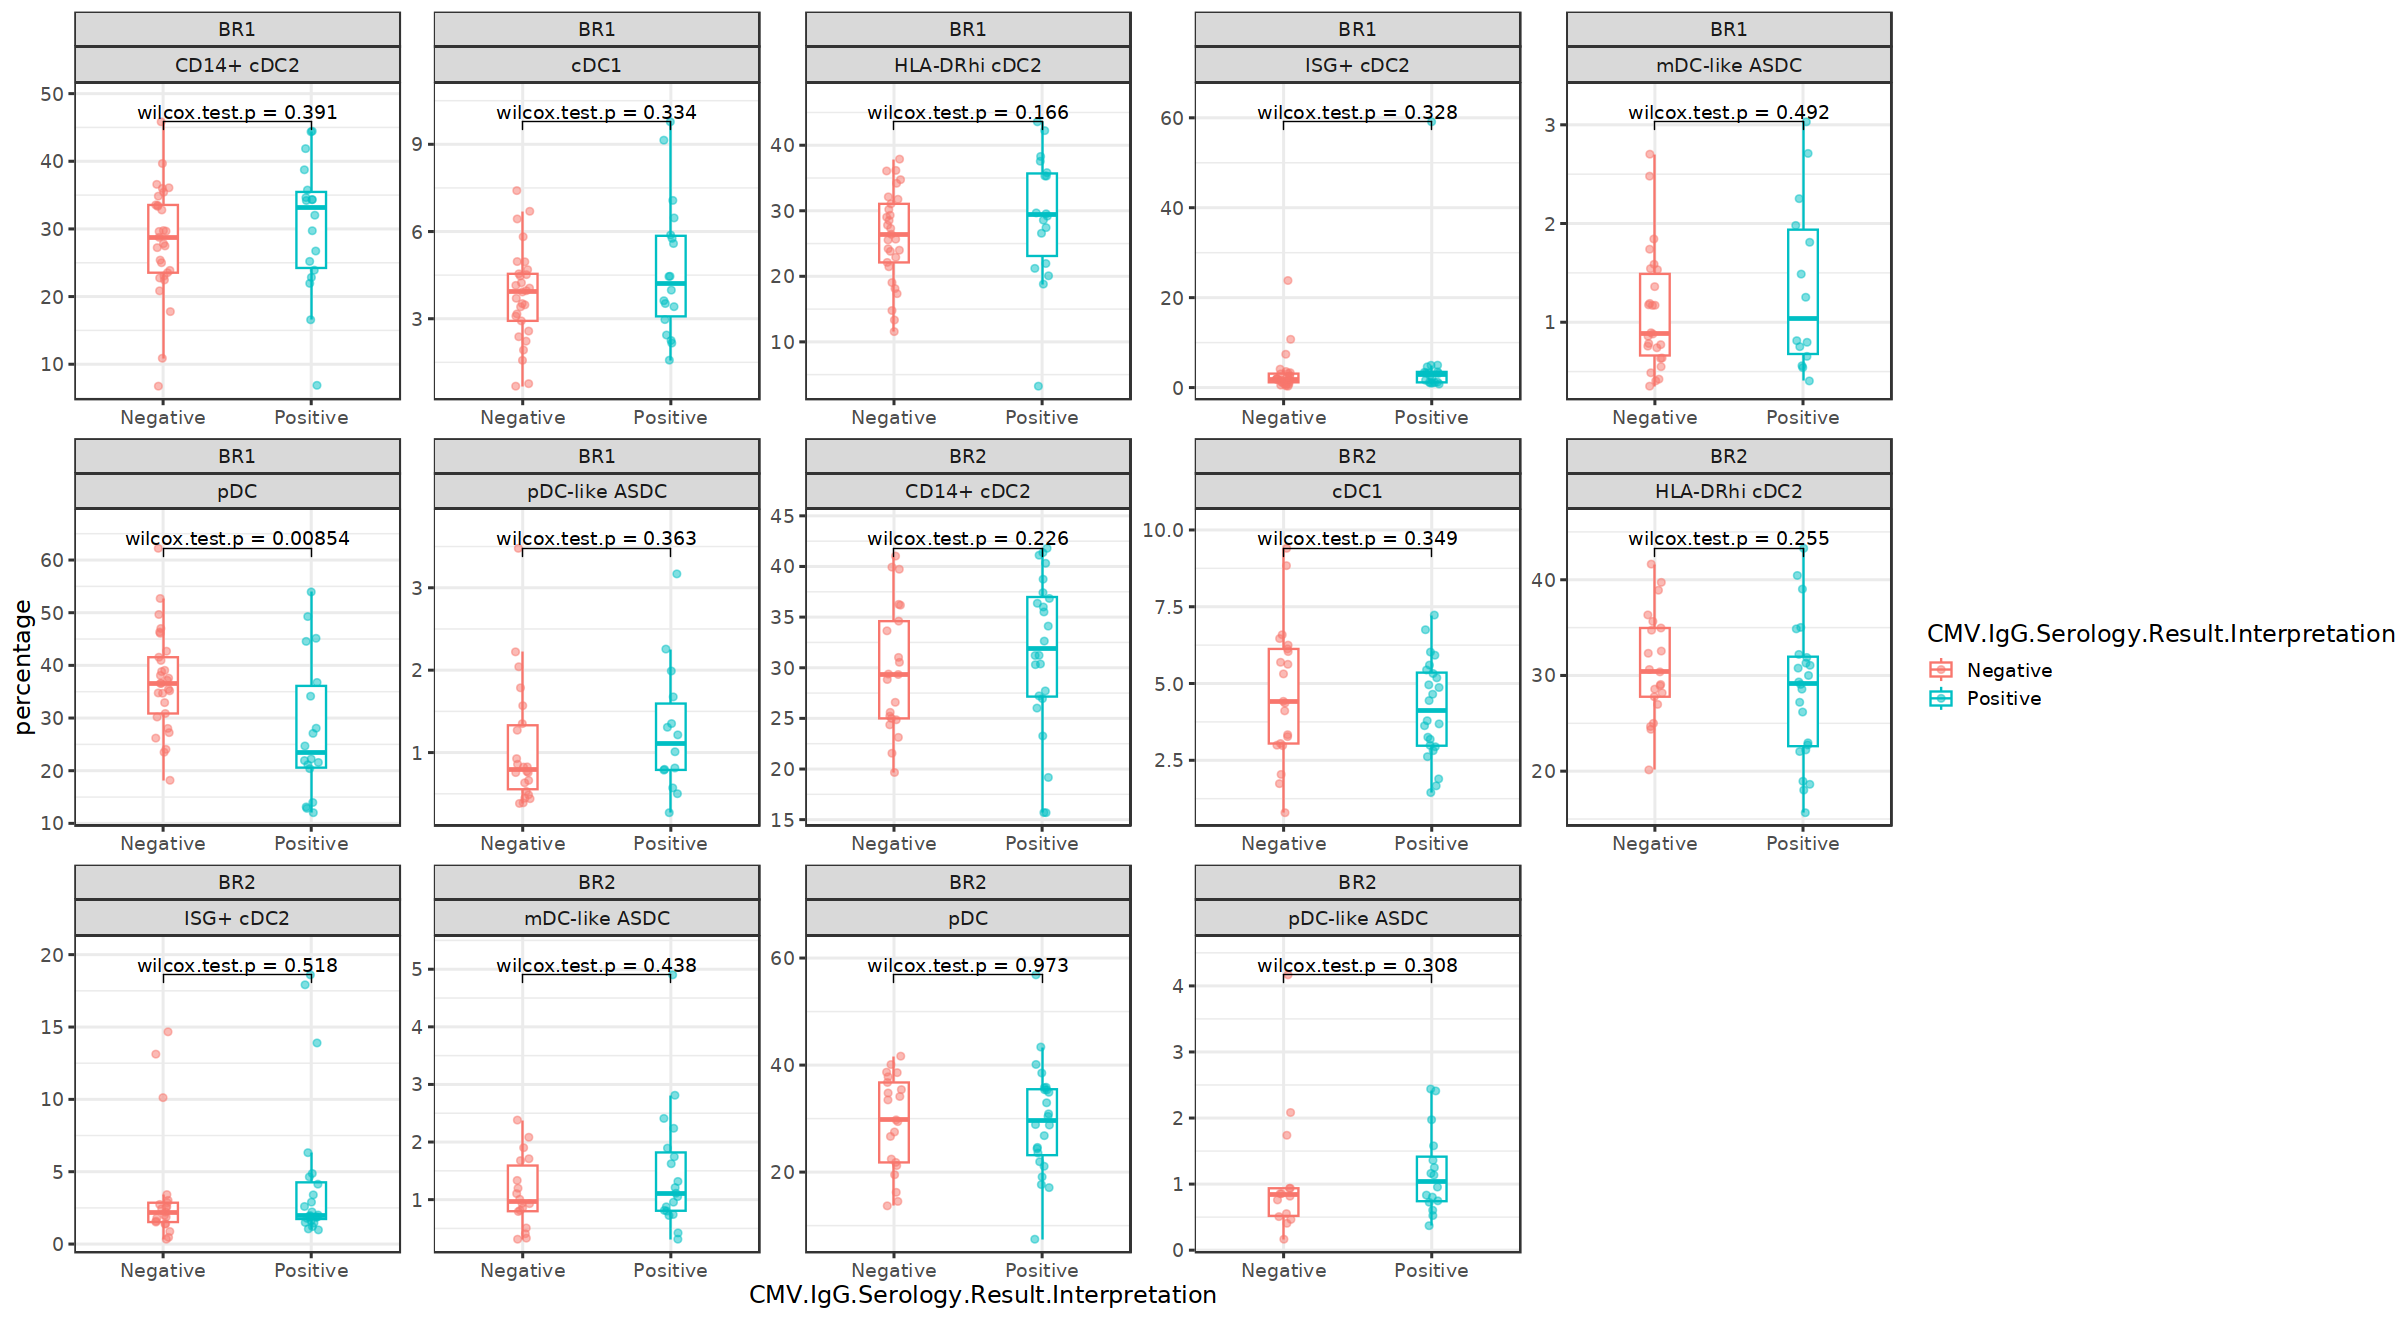

In [317]:
##percentage comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 11)

stat.test <- DC_df_other %>% select(percentage,AIFI_L3.5, CMV.IgG.Serology.Result.Interpretation ,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3.5,cohort.cohortGuid) %>%
  wilcox_test(percentage ~ CMV.IgG.Serology.Result.Interpretation)


max_values<-DC_df_other %>%
  group_by(AIFI_L3.5,cohort.cohortGuid) %>%
  slice(which.max(percentage))%>% select(percentage) %>% pull() 


stat.test$y.position<-max_values


my_plot <- ggplot(DC_df_other, aes(CMV.IgG.Serology.Result.Interpretation, percentage,color=CMV.IgG.Serology.Result.Interpretation)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~cohort.cohortGuid+AIFI_L3.5,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

my_plot

Adding missing grouping variables: `AIFI_L3.5`, `cohort.cohortGuid`


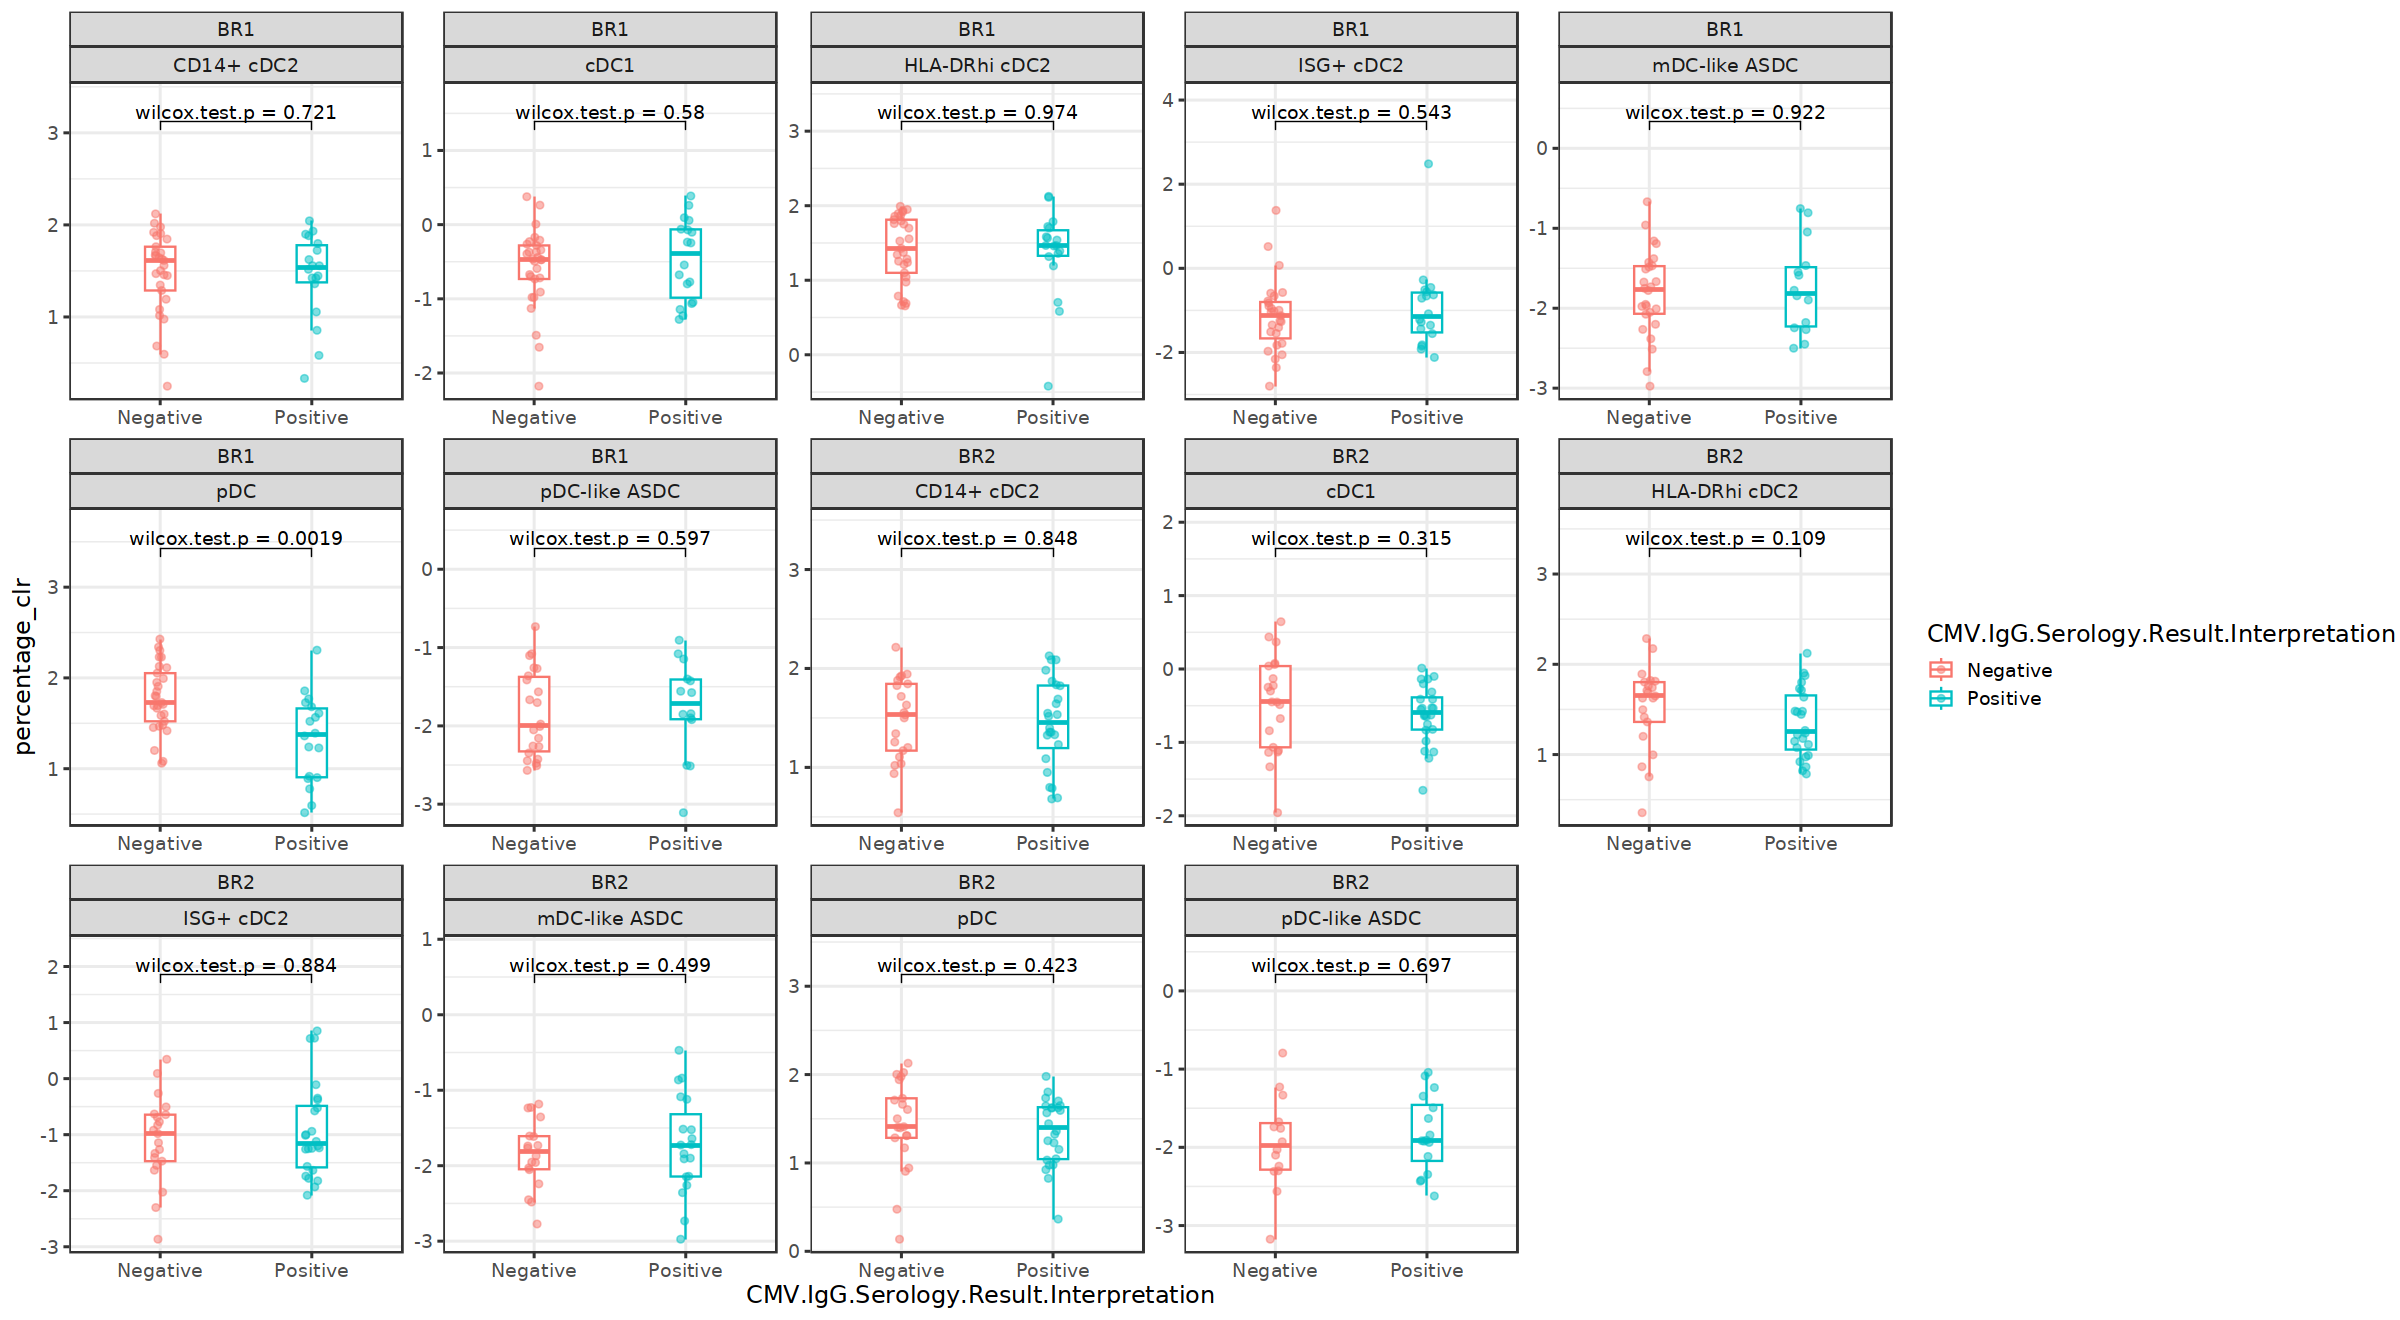

In [318]:
##percentage- CLR comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 11)

stat.test <- DC_df_other %>% select(percentage_clr,AIFI_L3.5,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3.5,cohort.cohortGuid) %>%
  wilcox_test(percentage_clr ~ CMV.IgG.Serology.Result.Interpretation)


max_values<-DC_df_other %>%
  group_by(AIFI_L3.5,cohort.cohortGuid) %>%
  slice(which.max(percentage_clr))%>% select(percentage_clr) %>% pull() + 1


stat.test$y.position<-max_values


my_plot <- ggplot(DC_df_other, aes(CMV.IgG.Serology.Result.Interpretation, percentage_clr,color=CMV.IgG.Serology.Result.Interpretation)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~cohort.cohortGuid+AIFI_L3.5,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

my_plot

# Comparsion within Monocyte in Lv3.5 (Percentage and Percentage CLR - AIFI Level 1 celltypes)

In [ ]:
monocyte_df_other <- myeloid_df %>% filter(AIFI_L1 == 'Monocyte')
head(monocyte_df_other)

In [ ]:
unique(monocyte_df_other$AIFI_L3.5)

In [ ]:
## Percentage of total

monocyte_df_other <- monocyte_df_other %>%
  dplyr::group_by(AIFI_L3.5, subject.subjectGuid) %>%               
  dplyr::summarise(count = n()) %>%                  # Count occurrences
  dplyr::group_by(subject.subjectGuid) %>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(subject.subjectGuid) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% # Group again by subjectGuid for CLR# Calculate percentage
  dplyr::ungroup()

head(monocyte_df_other)
#sum(result_Bcell$subject.subjectGuid)

In [ ]:
monocyte_df_other<-left_join(monocyte_df_other,unique(myeloid_df[c('cohort.cohortGuid','subject.subjectGuid','subject.biologicalSex','CMV.IgG.Serology.Result.Interpretation')]),by=c('subject.subjectGuid'))

In [ ]:
head(monocyte_df_other)

In [ ]:
monocyte_df_other %>% filter(subject.subjectGuid == "BR1006") %>% 
      select(percentage) %>%
      pull() %>% 
      sum()

In [ ]:
##percentage comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 13)

stat.test <- monocyte_df_other %>% select(percentage,AIFI_L3.5, CMV.IgG.Serology.Result.Interpretation ,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3.5,cohort.cohortGuid) %>%
  wilcox_test(percentage ~ CMV.IgG.Serology.Result.Interpretation)


max_values<-monocyte_df_other %>%
  group_by(AIFI_L3.5,cohort.cohortGuid) %>%
  slice(which.max(percentage))%>% select(percentage) %>% pull() 


stat.test$y.position<-max_values


my_plot <- ggplot(monocyte_df_other, aes(CMV.IgG.Serology.Result.Interpretation, percentage,color=CMV.IgG.Serology.Result.Interpretation)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~cohort.cohortGuid+AIFI_L3.5,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

my_plot

In [ ]:
##percentage- CLR comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 13)

stat.test <- monocyte_df_other %>% select(percentage_clr,AIFI_L3.5,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3.5,cohort.cohortGuid) %>%
  wilcox_test(percentage_clr ~ CMV.IgG.Serology.Result.Interpretation)


max_values<-monocyte_df_other %>%
  group_by(AIFI_L3.5,cohort.cohortGuid) %>%
  slice(which.max(percentage_clr))%>% select(percentage_clr) %>% pull() + 1


stat.test$y.position<-max_values


my_plot <- ggplot(monocyte_df_other, aes(CMV.IgG.Serology.Result.Interpretation, percentage_clr,color=CMV.IgG.Serology.Result.Interpretation)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~cohort.cohortGuid+AIFI_L3.5,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

my_plot

In [67]:
head(result)

AIFI_L3 subject.subjectGuid count percentage percentage_clr cohort.cohortGuid
1 ASDC    BR1001              6     0.03236770 -2.232976      BR1              
2 ASDC    BR1002              5     0.02637409 -2.242500      BR1              
3 ASDC    BR1003              4     0.02094680 -2.763896      BR1              
4 ASDC    BR1004              3     0.01710571 -2.626914      BR1              
5 ASDC    BR1005              5     0.02809620 -1.943233      BR1              
6 ASDC    BR1006              4     0.02300966 -2.337902      BR1              
  subject.biologicalSex CMV.IgG.Serology.Result.Interpretation
1 Female                Negative                              
2 Male                  Negative                              
3 Female                Negative                              
4 Male                  Negative                              
5 Female                Negative                              
6 Male                  Negative

In [ ]:
###ROUGH WORK

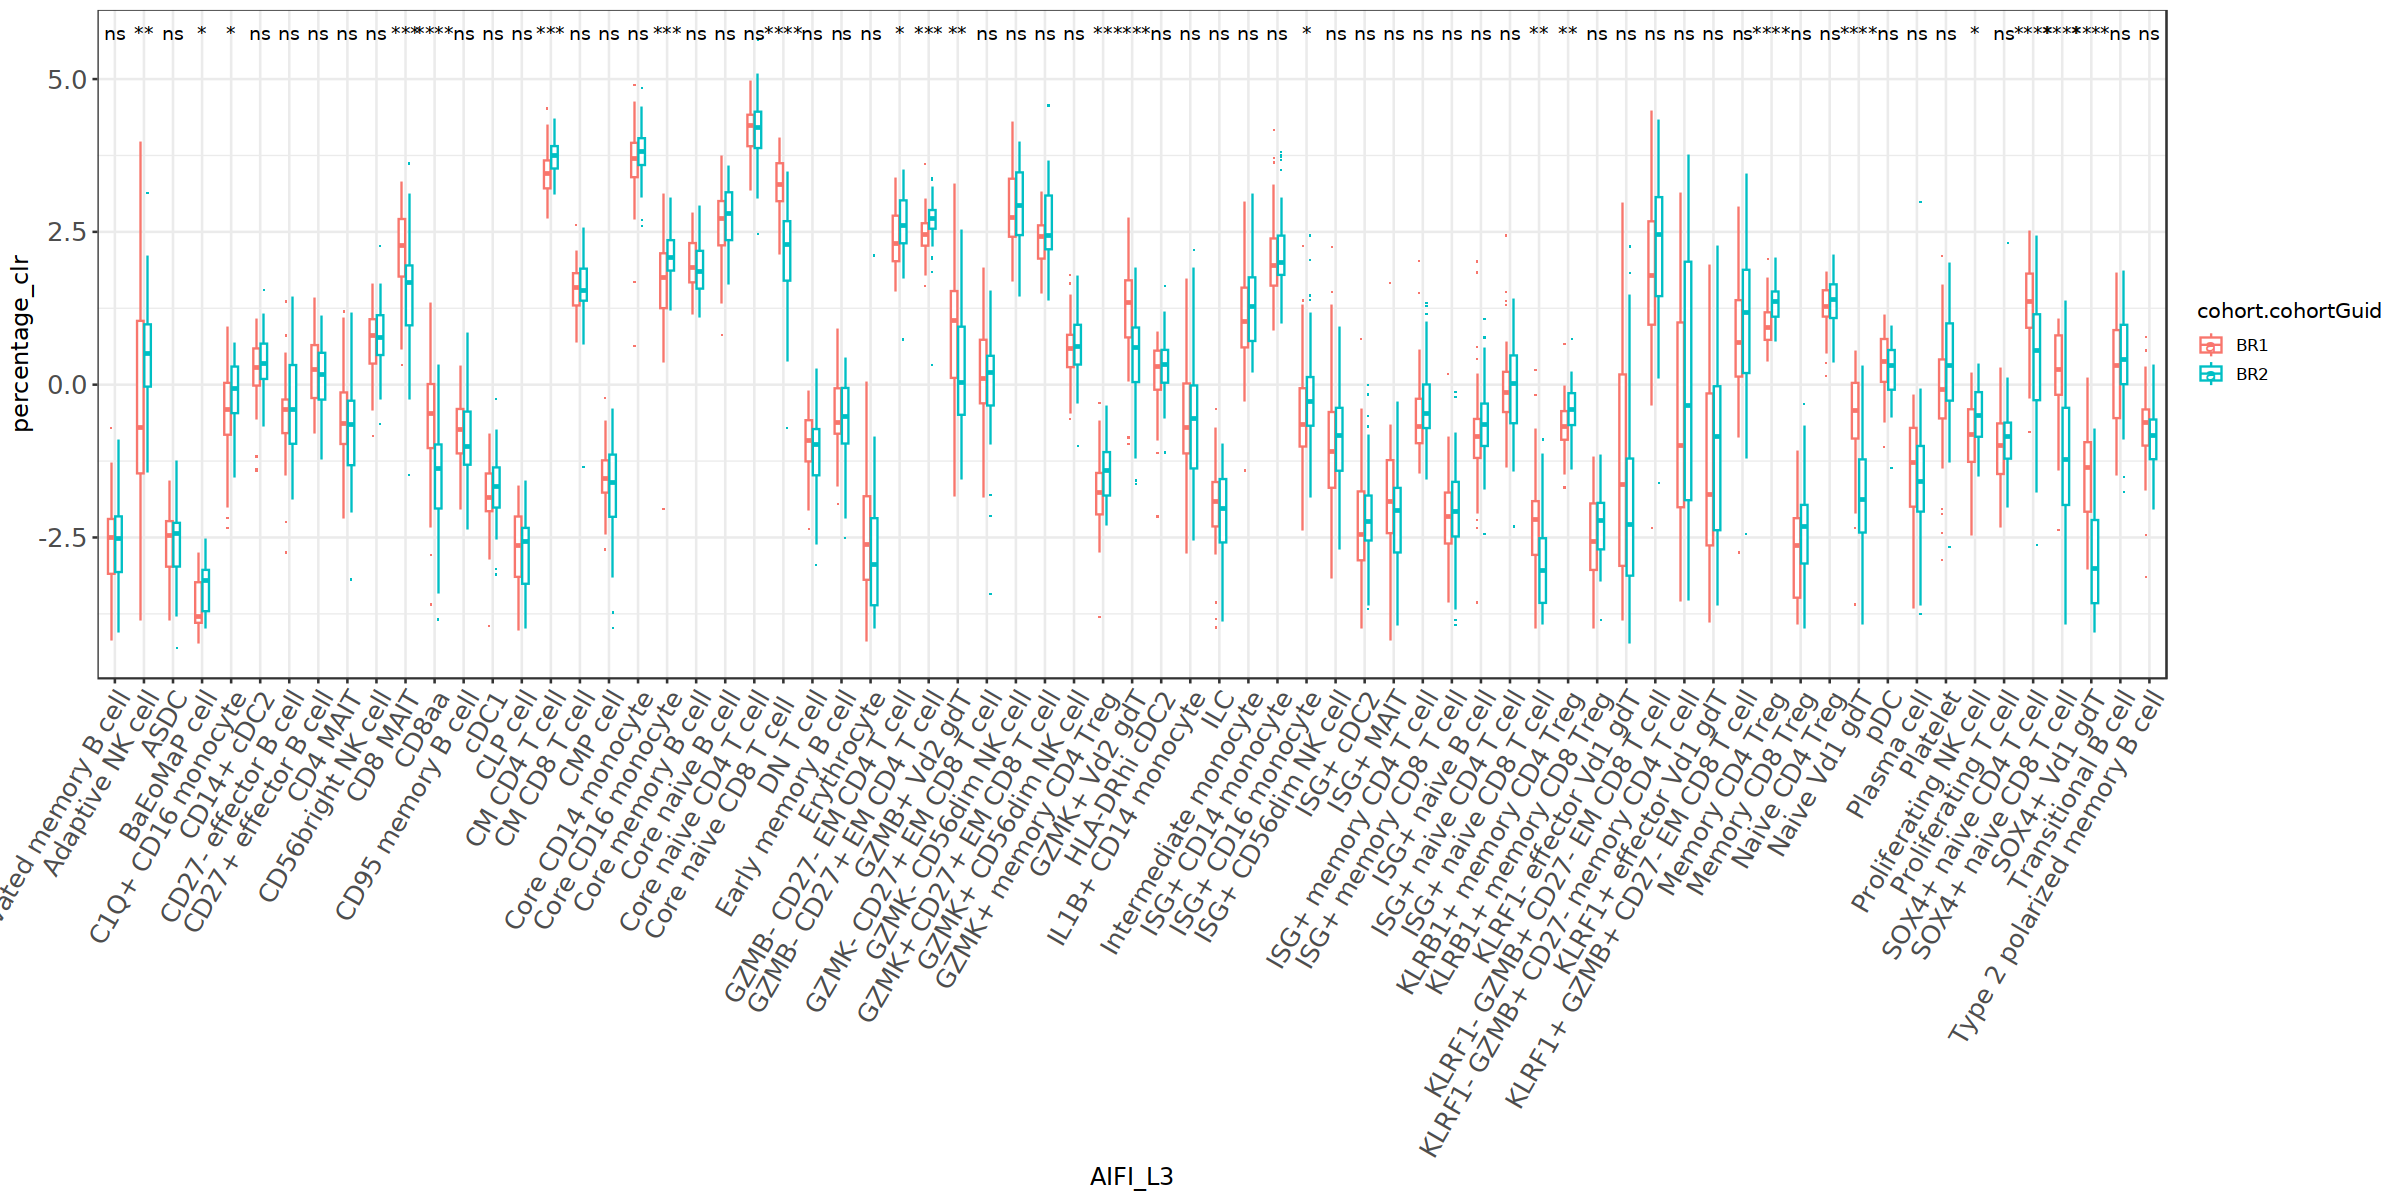

In [74]:
p4 <- ggplot(result, aes(x = AIFI_L3, y = percentage_clr, color = cohort.cohortGuid)) + 
  geom_boxplot(width = .5, outlier.shape = '.') + 
  scale_x_discrete(name ="AIFI_L3", guide = guide_axis(angle = 60)) + 
  theme_bw(base_size = 12) +
  theme(axis.text = element_text(size = 15), axis.title = element_text(size = 14)) +
  stat_compare_means(aes(group = cohort.cohortGuid), method = "wilcox.test", label = "p.signif") 

p4

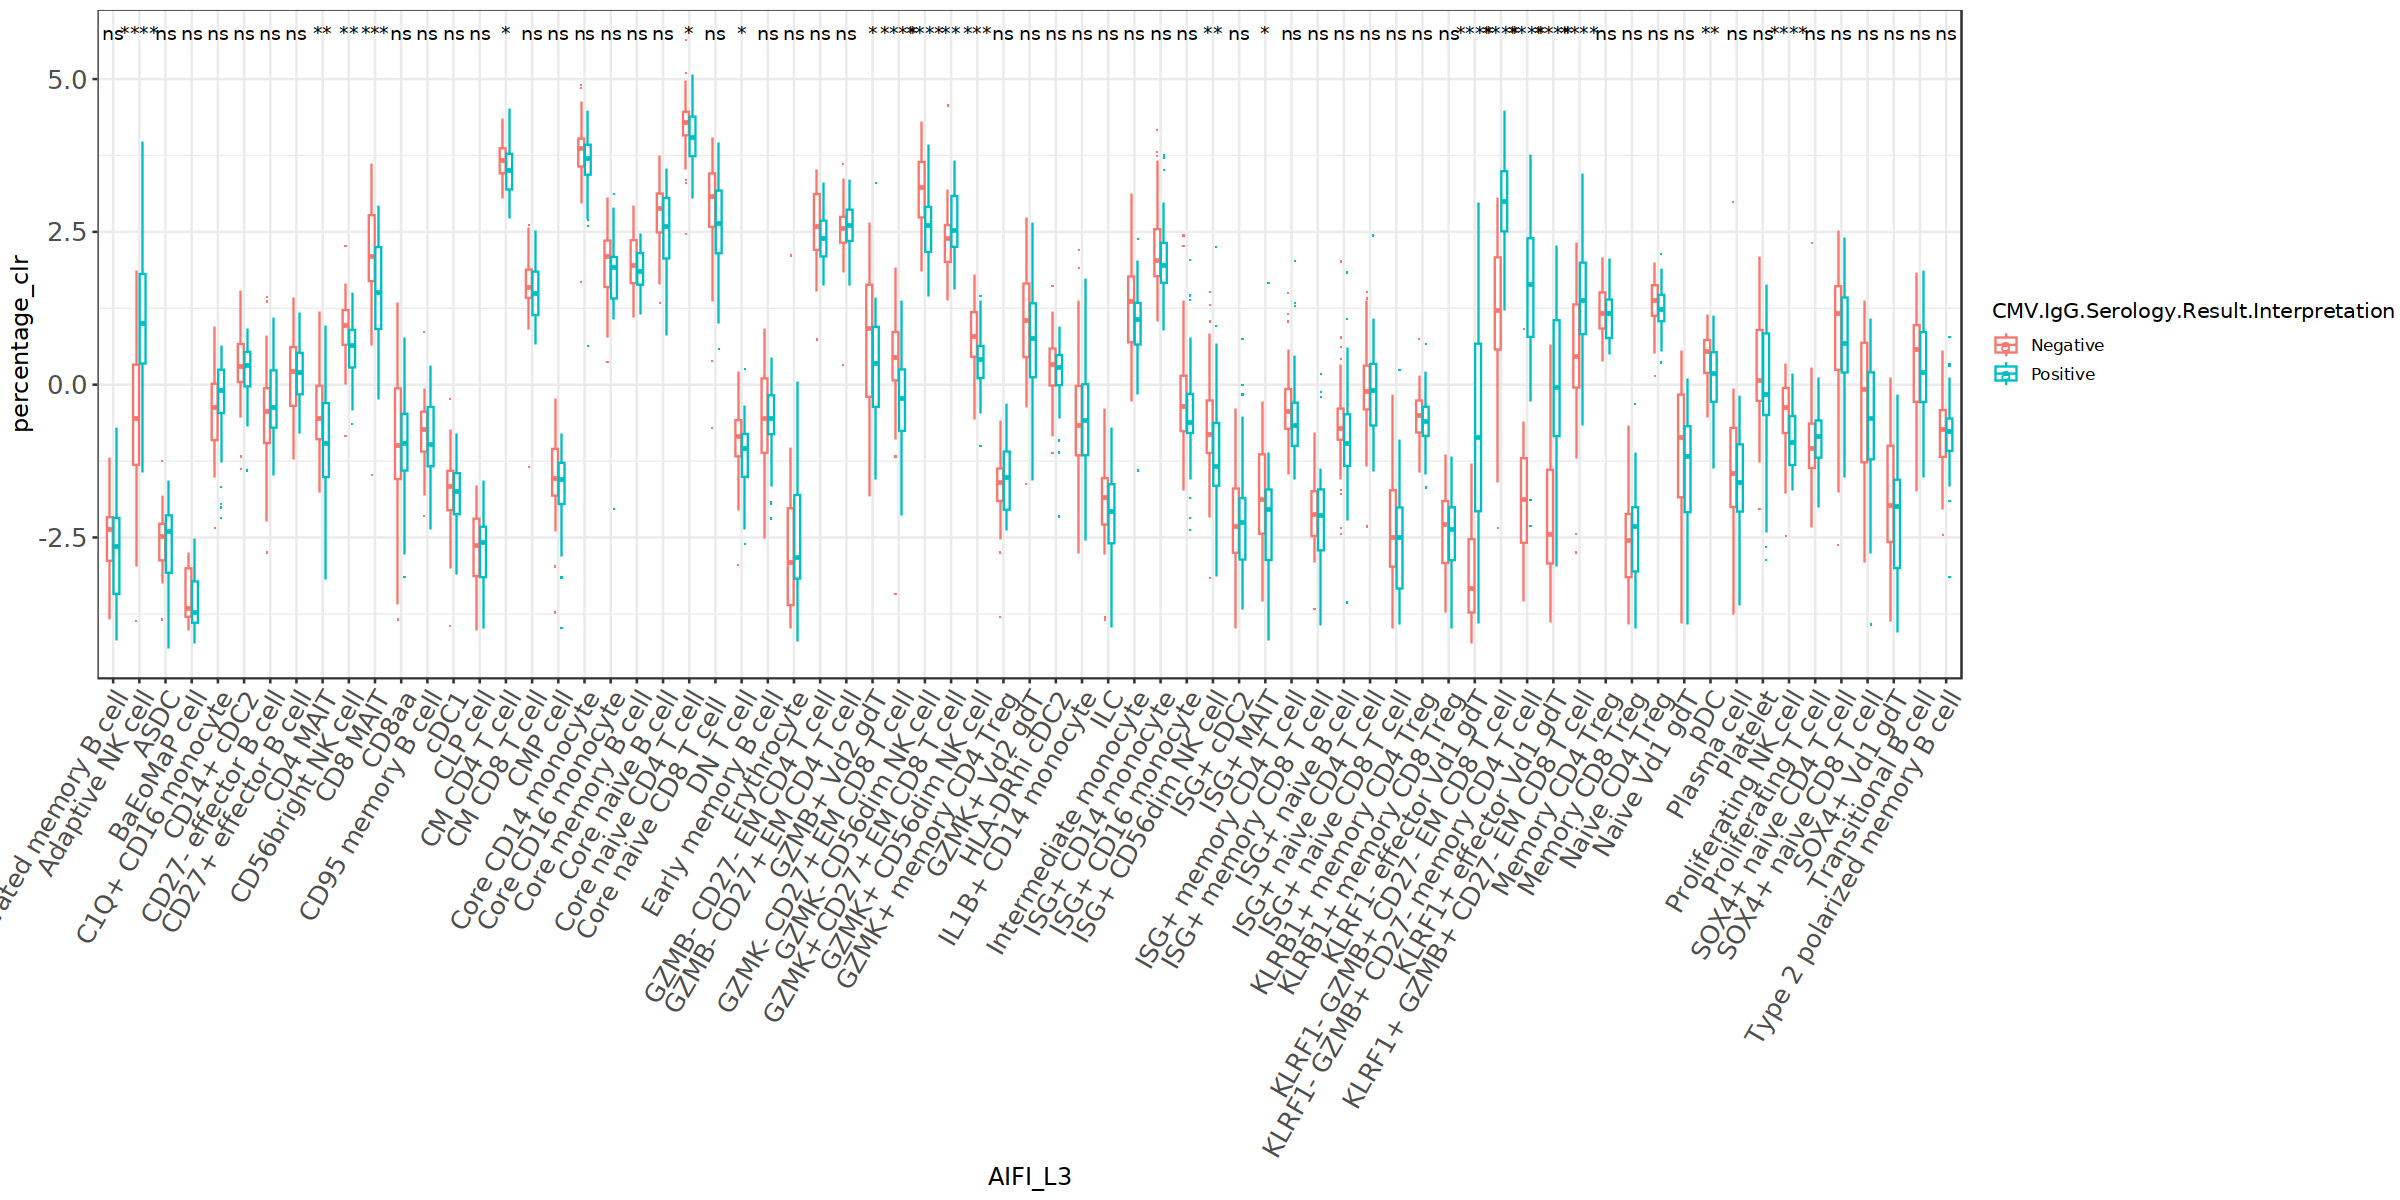

In [81]:
p4 <- ggplot(result, aes(x = AIFI_L3, y = percentage_clr, color = CMV.IgG.Serology.Result.Interpretation)) + 
  geom_boxplot(width = .5, outlier.shape = '.') + 
  scale_x_discrete(name ="AIFI_L3", guide = guide_axis(angle = 60)) + 
  theme_bw(base_size = 12) +
  theme(axis.text = element_text(size = 15), axis.title = element_text(size = 14)) +
  stat_compare_means(aes(group = CMV.IgG.Serology.Result.Interpretation), method = "wilcox.test", label = "p.signif") 

p4

Warning message in stat_compare_means(aes(group = cohort.cohortGuid), method = "wilcox.test", :
“Ignoring unknown parameters: `p.adjust.method`”


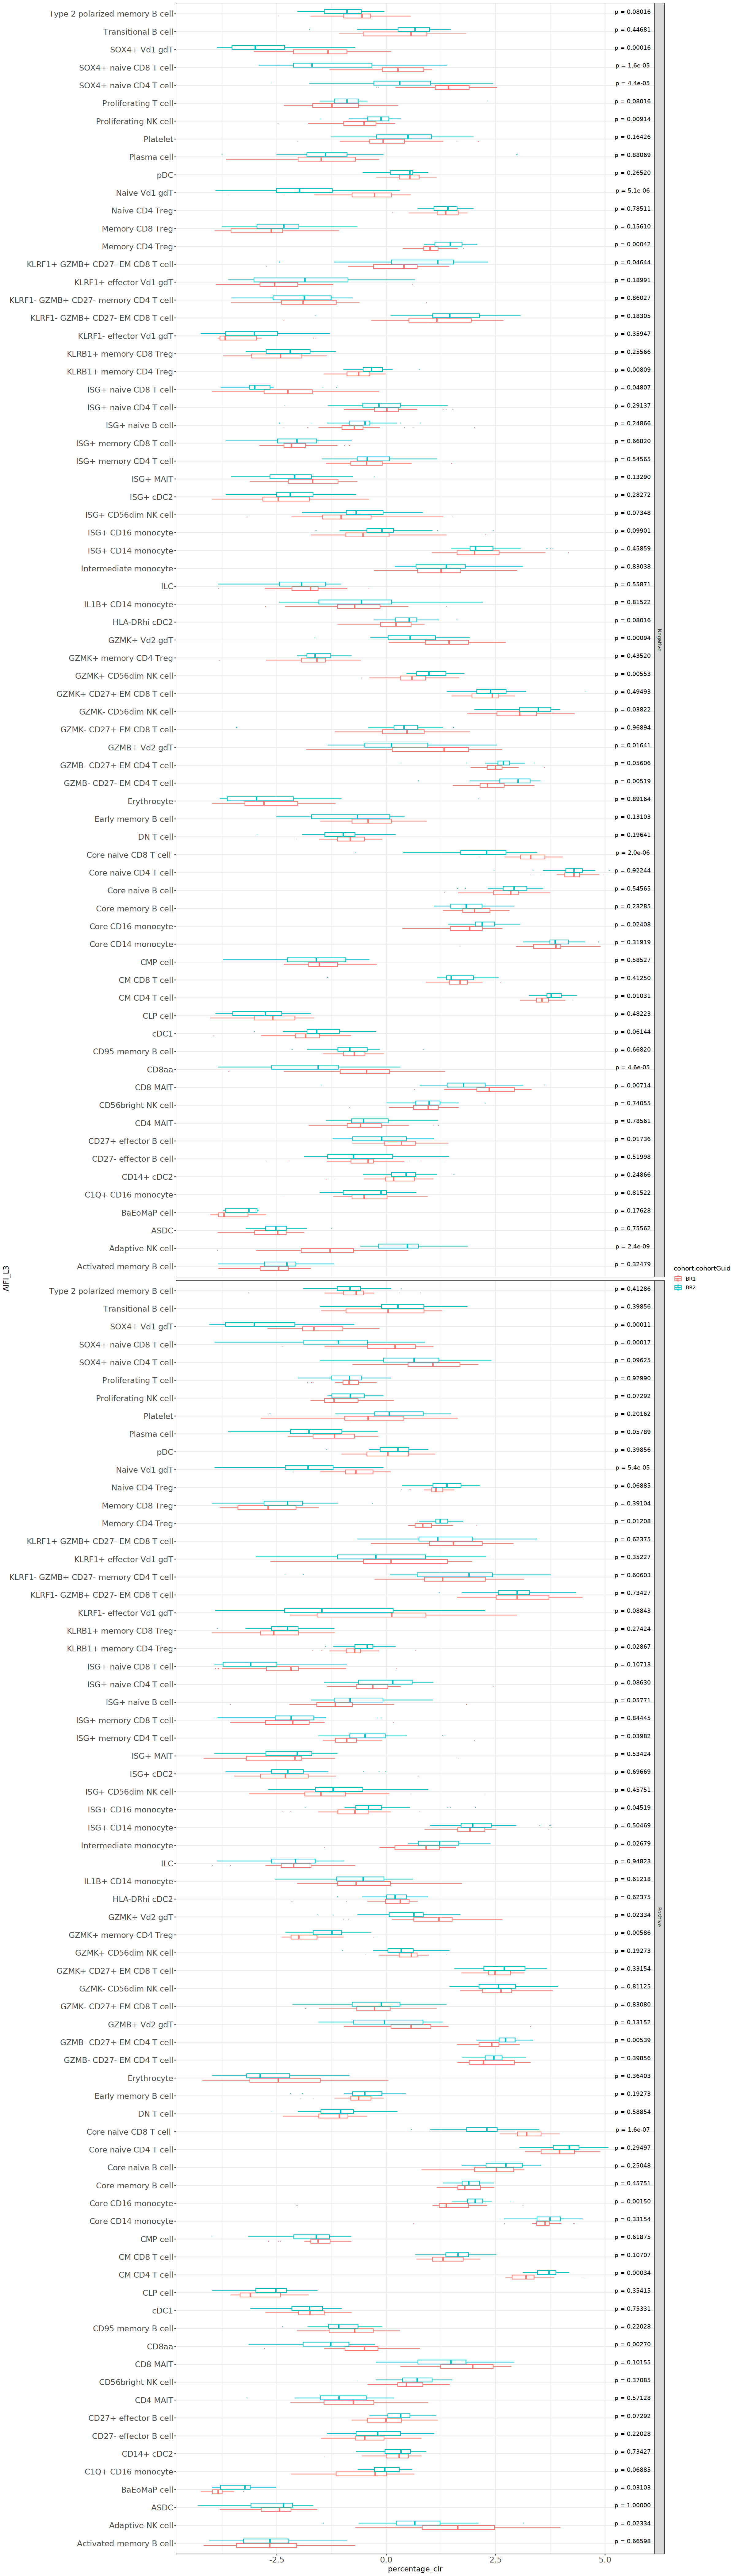

In [247]:
options(repr.plot.width = 20, repr.plot.height = 70)
p4 <- ggplot(result, aes(x = AIFI_L3, y = percentage_clr, color = cohort.cohortGuid)) + 
  geom_boxplot(width = .5, outlier.shape = '.') + 
  scale_x_discrete(name ="AIFI_L3", guide = guide_axis(angle = 0)) + 
  theme_bw(base_size = 12) +
  theme(axis.text = element_text(size = 15), axis.title = element_text(size = 14)) +
  stat_compare_means(aes(group = cohort.cohortGuid), method = "wilcox.test",  p.adjust.method = "BH", label= "p") + coord_flip() +
  facet_grid(CMV.IgG.Serology.Result.Interpretation ~ ., scales = "free_y", space = "free_y")  # Use facet_grid for separate plots



# Display the plot
print(p4)


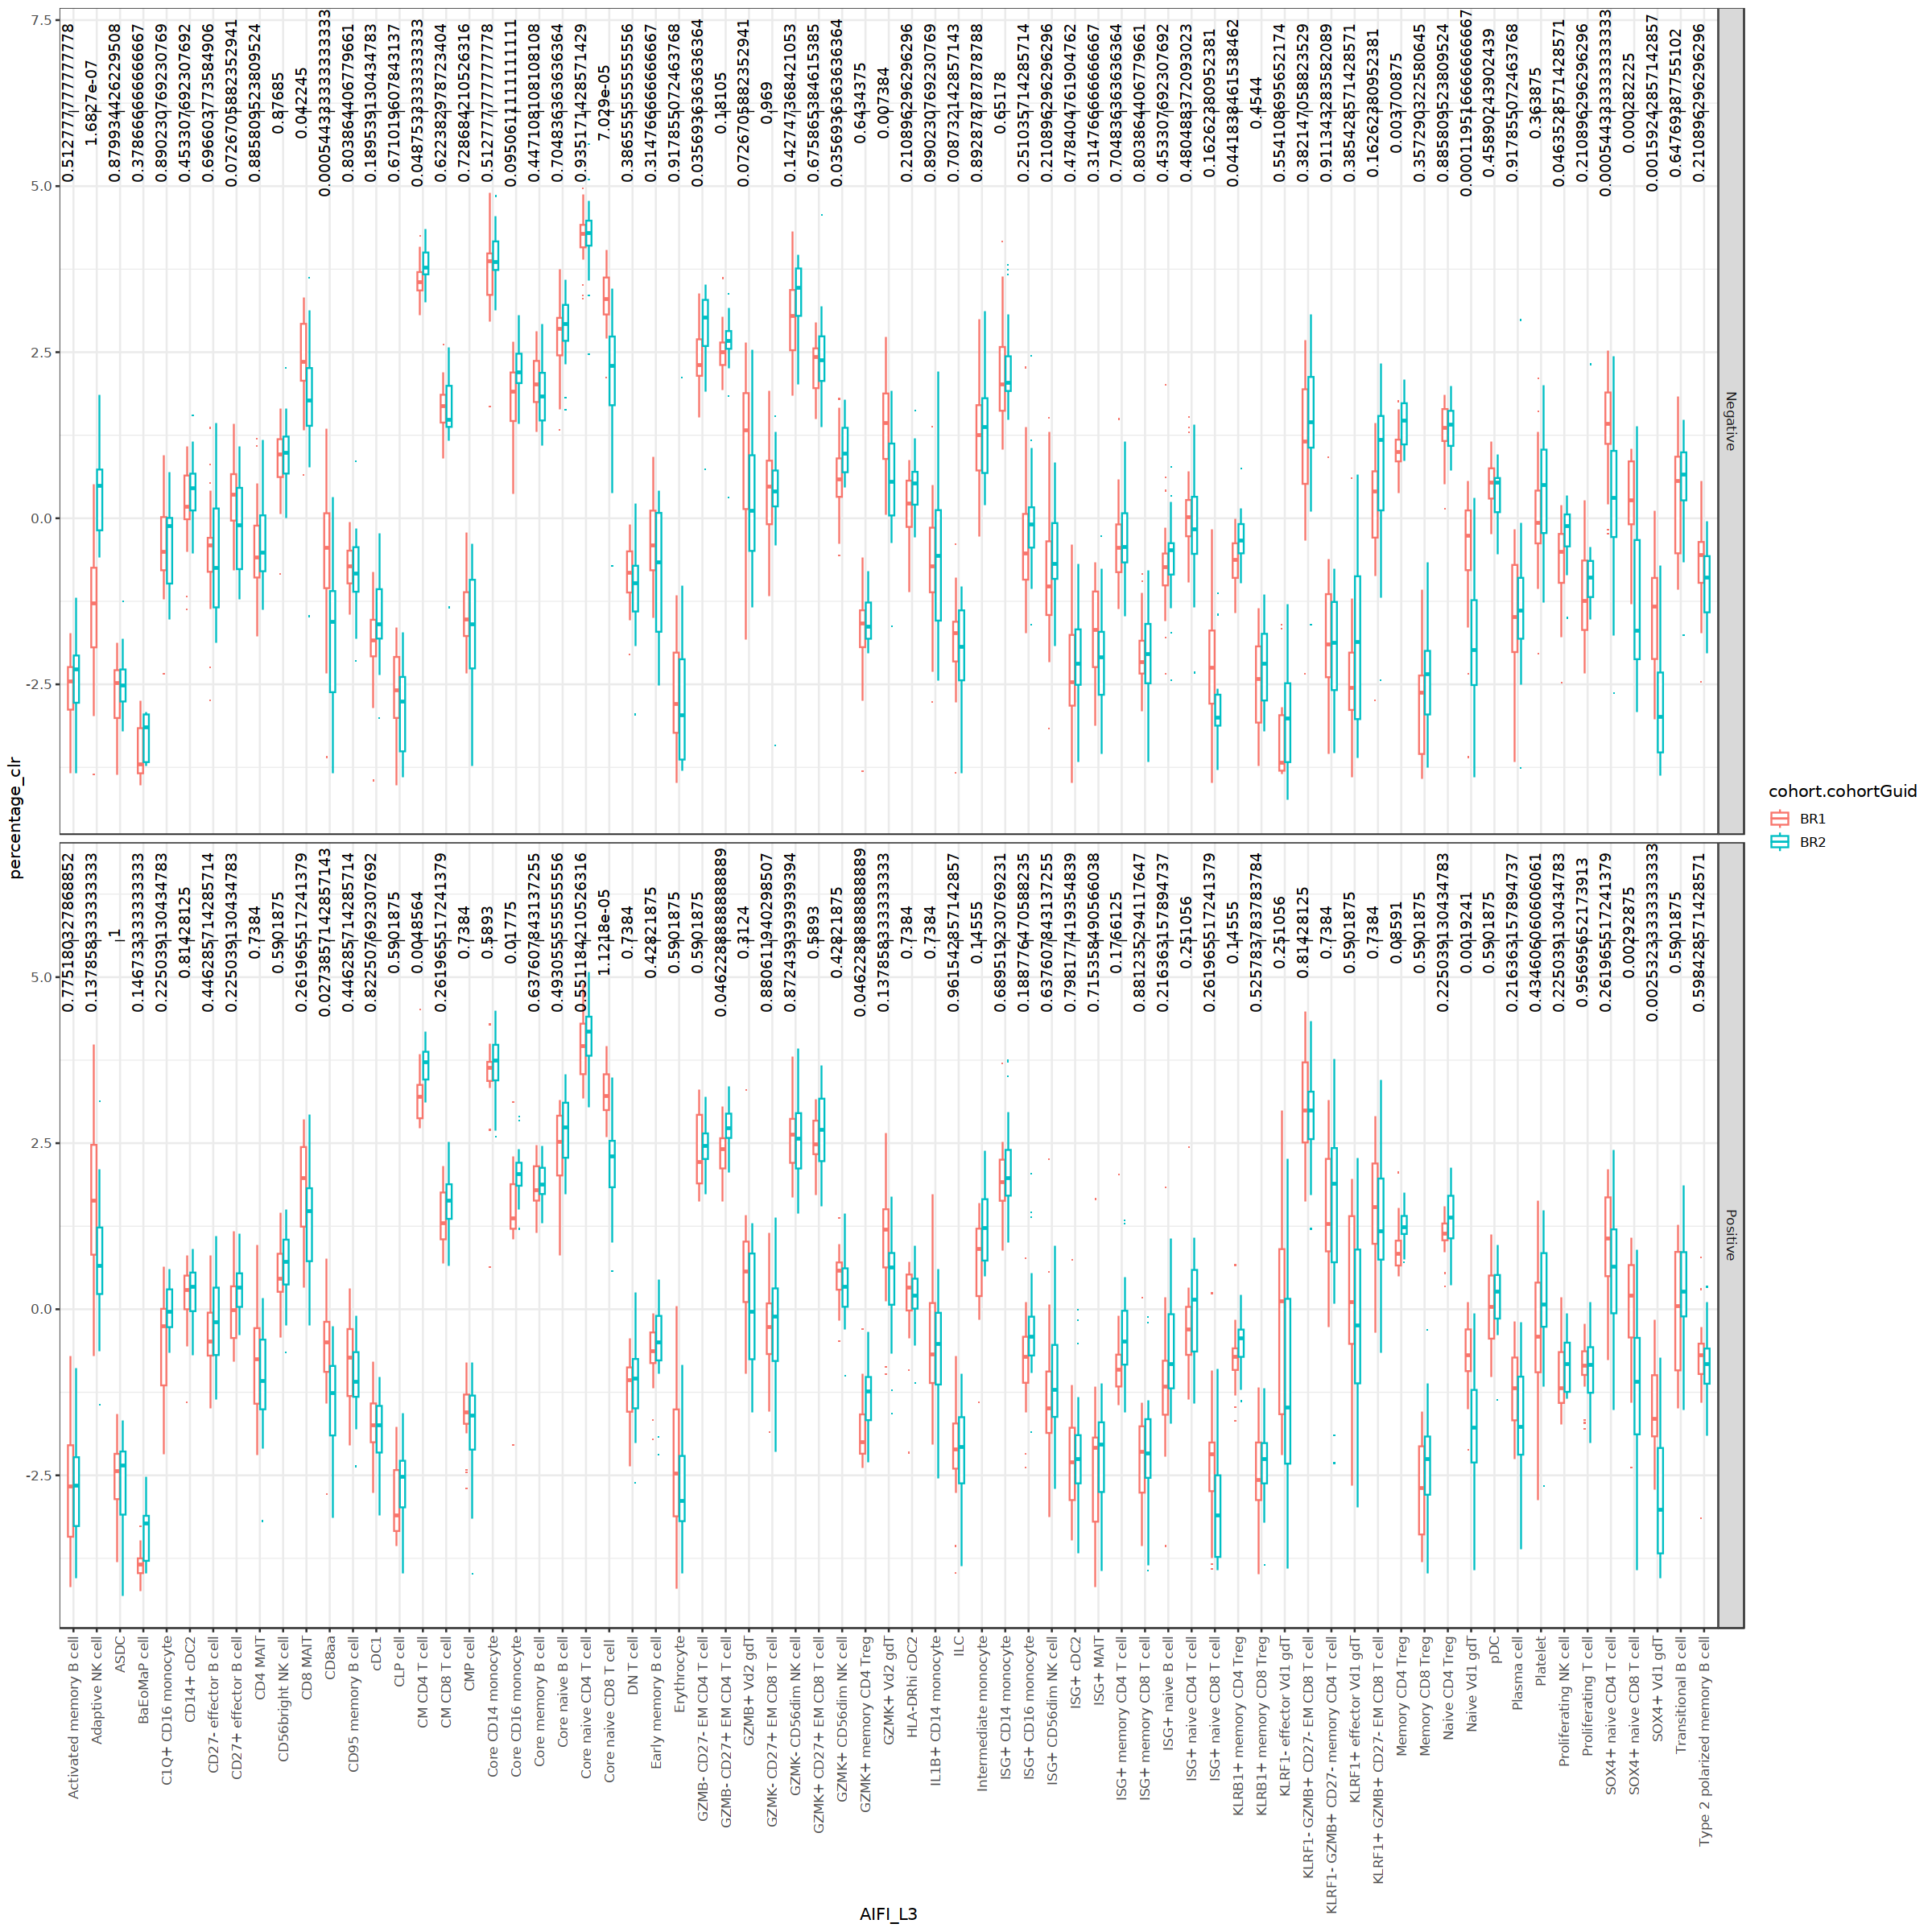

In [285]:
library(ggplot2)
library(ggpubr)

# Assuming you already have the 'stat_test' object from compare_means
# Perform the Wilcoxon test and get adjusted p-values
#stat_test <- compare_means(
 # percentage_clr ~ cohort.cohortGuid, 
 # data = result, 
 # group_by = c("AIFI_L3", "CMV.IgG.Serology.Result.Interpretation"), 
  #method = "wilcox.test"
#)

stat_test <- result %>% select(percentage_clr,AIFI_L3,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  wilcox_test(percentage_clr ~ CMV.IgG.Serology.Result.Interpretation)%>%
  adjust_pvalue(method = "BH") %>%
  add_significance()
  



# Store adjusted p-values in a new column
#stat_test$p_adjusted <- p.adjust(stat_test$p, method = "BH")  # Adjust method as needed

#max_values<-result %>%
# group_by(AIFI_L3,cohort.cohortGuid) %>%
# slice(which.max(percentage_clr))%>% select(percentage_clr) %>% pull() 


#stat_test$y.position<-max_values


# Create the plot
options(repr.plot.width = 20, repr.plot.height = 20)
p4 <- ggplot(result, aes(x = AIFI_L3, y = percentage_clr, color = cohort.cohortGuid)) + 
  geom_boxplot(width = .5, outlier.shape = '.') + 
  scale_x_discrete(name ="AIFI_L3", guide = guide_axis(angle = 90)) + 
  theme_bw(base_size = 12) +
  #theme(axis.text = element_text(size = 15), axis.title = element_tex.at(size = 14)) + 
  #stat_pvalue_manual(stat_test, label = "p.adj", y.position = 20) + 
  #coord_flip() +
  geom_pwc(
    aes(group = cohort.cohortGuid), tip.length = 0, p.adjust.method = "BH",
    method = "wilcox_test", label ="p.adj", angle = 90 #,bracket.nudge.y = -0.08
  )+
  facet_grid(CMV.IgG.Serology.Result.Interpretation ~ ., scales = "free_y", space = "free_y")+
   scale_y_continuous(expand = expansion(mult = c(0.05, 0.15))) #+
  #stat_compare_means(
    #aes(label = ifelse("p.adj" < 0.05, "*", "")),
   # method = "wilcox.test", label.y = 25, label.x = "cohen.position", angle = 90
  #)
  


# Display the plot
print(p4)




In [252]:
stat_test

AIFI_L3                        cohort.cohortGuid .y.            group1  
1   ASDC                           BR1               percentage_clr Negative
2   ASDC                           BR2               percentage_clr Negative
3   Activated memory B cell        BR1               percentage_clr Negative
4   Activated memory B cell        BR2               percentage_clr Negative
5   Adaptive NK cell               BR1               percentage_clr Negative
6   Adaptive NK cell               BR2               percentage_clr Negative
7   BaEoMaP cell                   BR1               percentage_clr Negative
8   BaEoMaP cell                   BR2               percentage_clr Negative
9   C1Q+ CD16 monocyte             BR1               percentage_clr Negative
10  C1Q+ CD16 monocyte             BR2               percentage_clr Negative
11  CD14+ cDC2                     BR1               percentage_clr Negative
12  CD14+ cDC2                     BR2               percentage_clr Negative
13  CD27+ effector B cell          BR1               percentage_clr Negative
14  CD27+ effector B cell          BR2               percentage_clr Negative
15  CD27- effector B cell          BR1               percentage_clr Negative
16  CD27- effector B cell          BR2               percentage_clr Negative
17  CD4 MAIT                       BR1               percentage_clr Negative
18  CD4 MAIT                       BR2               percentage_clr Negative
19  CD56bright NK cell             BR1               percentage_clr Negative
20  CD56bright NK cell             BR2               percentage_clr Negative
21  CD8 MAIT                       BR1               percentage_clr Negative
22  CD8 MAIT                       BR2               percentage_clr Negative
23  CD8aa                          BR1               percentage_clr Negative
24  CD8aa                          BR2               percentage_clr Negative
25  CD95 memory B cell             BR1               percentage_clr Negative
26  CD95 memory B cell             BR2               percentage_clr Negative
27  CLP cell                       BR1               percentage_clr Negative
28  CLP cell                       BR2               percentage_clr Negative
29  CM CD4 T cell                  BR1               percentage_clr Negative
30  CM CD4 T cell                  BR2               percentage_clr Negative
⋮   ⋮                              ⋮                 ⋮              ⋮       
113 Memory CD4 Treg                BR1               percentage_clr Negative
114 Memory CD4 Treg                BR2               percentage_clr Negative
115 Memory CD8 Treg                BR1               percentage_clr Negative
116 Memory CD8 Treg                BR2               percentage_clr Negative
117 Naive CD4 Treg                 BR1               percentage_clr Negative
118 Naive CD4 Treg                 BR2               percentage_clr Negative
119 Naive Vd1 gdT                  BR1               percentage_clr Negative
120 Naive Vd1 gdT                  BR2               percentage_clr Negative
121 Plasma cell                    BR1               percentage_clr Negative
122 Plasma cell                    BR2               percentage_clr Negative
123 Platelet                       BR1               percentage_clr Negative
124 Platelet                       BR2               percentage_clr Negative
125 Proliferating NK cell          BR1               percentage_clr Negative
126 Proliferating NK cell          BR2               percentage_clr Negative
127 Proliferating T cell           BR1               percentage_clr Negative
128 Proliferating T cell           BR2               percentage_clr Negative
129 SOX4+ Vd1 gdT                  BR1               percentage_clr Negative
130 SOX4+ Vd1 gdT                  BR2               percentage_clr Negative
131 SOX4+ naive CD4 T cell         BR1               percentage_clr Negative
132 SOX4+ naive CD4 T cell         BR2               percentage_clr Negative


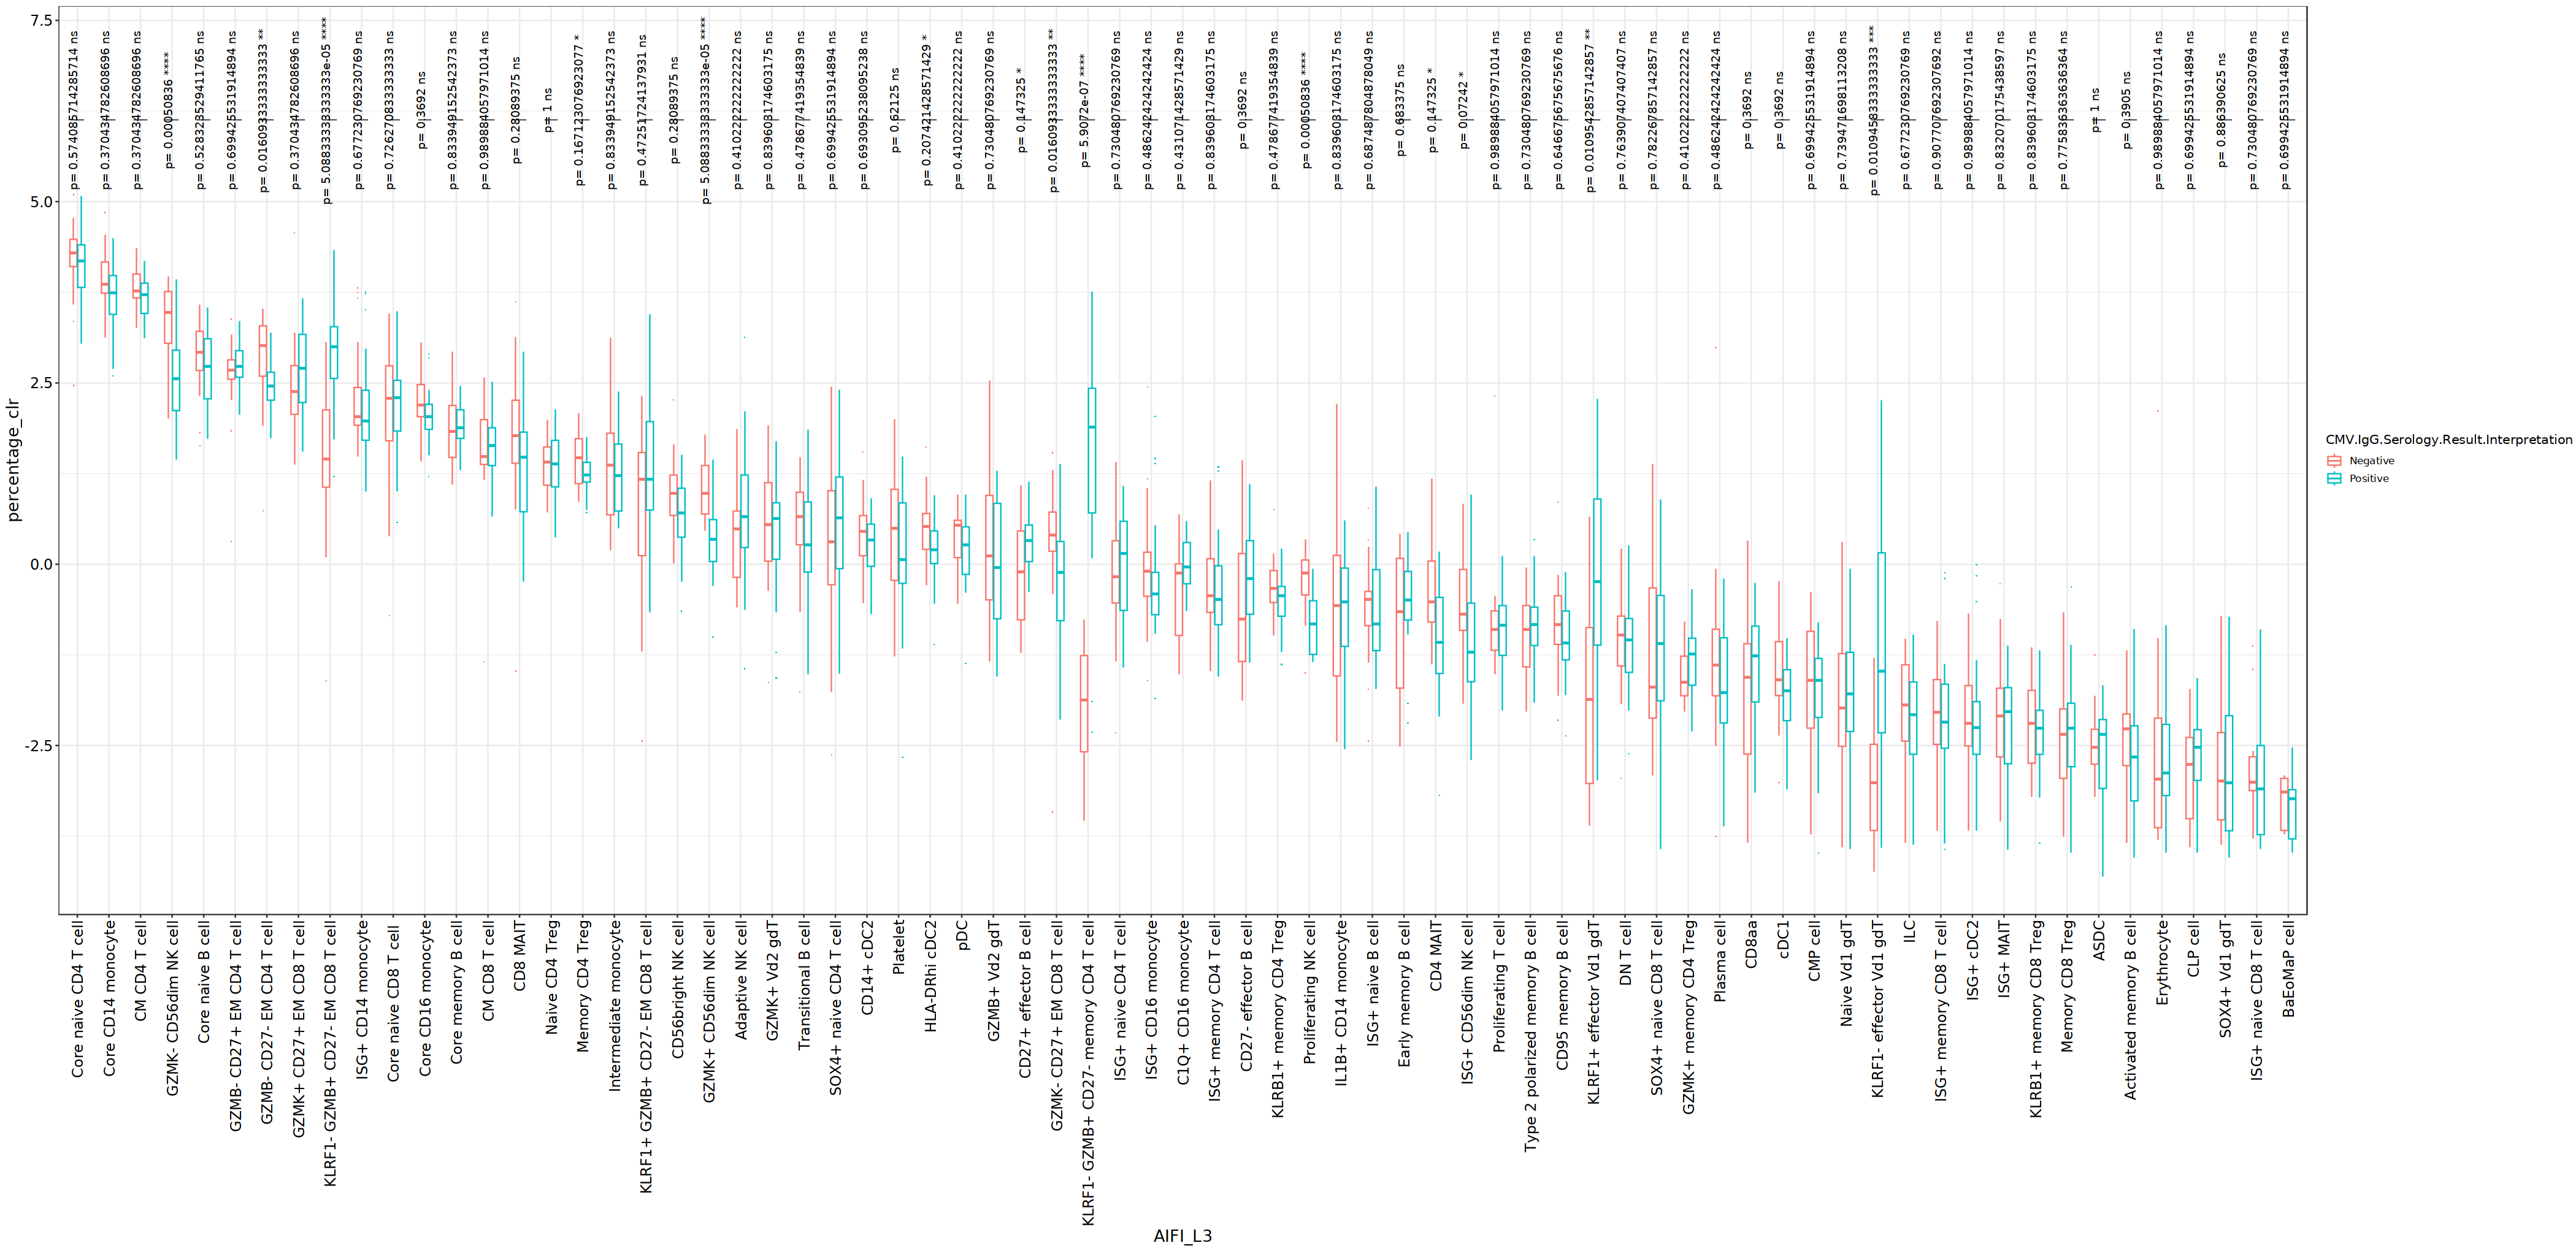

In [309]:
# Compute adjusted p-values for the table

result_cohort <- result[result$cohort.cohortGuid == 'BR2', ]

stat_test_2 <- result_cohort %>%
  select(percentage_clr, AIFI_L3, CMV.IgG.Serology.Result.Interpretation, cohort.cohortGuid) %>%
  unique(.) %>%
  group_by(AIFI_L3, cohort.cohortGuid) %>%
  wilcox_test(percentage_clr ~ CMV.IgG.Serology.Result.Interpretation) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()


# Store adjusted p-values in a new column in the original dataframe
#result <- result %>%
 # left_join(stat_test_1, by = c("AIFI_L3", "cohort.cohortGuid"))

#only select one cohort at a time


# Create the plot
options(repr.plot.width = 35, repr.plot.height = 17)
p4 <- ggplot(result_cohort, aes(x = reorder(AIFI_L3, desc(percentage_clr)) , y = percentage_clr, color = CMV.IgG.Serology.Result.Interpretation)) +
  geom_boxplot(width = .5, outlier.shape = '.') +
  scale_x_discrete(name ="AIFI_L3", guide = guide_axis(angle = 90)) +
  theme_bw(base_size = 12) +
  geom_pwc(
    aes(group = CMV.IgG.Serology.Result.Interpretation),
    tip.length = 0, p.adjust.method = "BH",
    method = "wilcox_test", label ="p= {p.adj} {p.signif}", angle = 90, hide.ns = FALSE  # or "panel"
  ) +
  #facet_grid(cohort.cohortGuid ~ ., scales = "free_y", space = "free_y") +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15))) +
  theme(axis.text.x = element_text(size = 14, color = "black", angle = 90, hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(size = 14, color = "black"),
        axis.title.x = element_text(size = 16, color = "black"),
        axis.title.y = element_text(size = 16, color = "black"))

# Display the plot
print(p4)


In [302]:
# Compute adjusted p-values for the table

#result_cohort <- result[result$cohort.cohortGuid == 'BR2', ]

stat_test_2 <- result %>%
  select(percentage_clr, AIFI_L3, CMV.IgG.Serology.Result.Interpretation, cohort.cohortGuid) %>%
  unique(.) %>%
  group_by(AIFI_L3, cohort.cohortGuid) %>%
  wilcox_test(percentage_clr ~ CMV.IgG.Serology.Result.Interpretation) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()


# Store adjusted p-values in a new column in the original dataframe
#result <- result %>%
 # left_join(stat_test_1, by = c("AIFI_L3", "cohort.cohortGuid"))

#only select one cohort at a time


# Create the plot
options(repr.plot.width = 27, repr.plot.height = 20)
p4 <- ggplot(result, aes(x = reorder(AIFI_L3, percentage_clr), y = percentage_clr, color = CMV.IgG.Serology.Result.Interpretation)) +
  geom_boxplot(width = .5, outlier.shape = '.') +
  scale_x_discrete(name ="AIFI_L3", guide = guide_axis(angle = 90)) +
  theme_bw(base_size = 12) +
  geom_pwc(
    aes(group = CMV.IgG.Serology.Result.Interpretation),
    tip.length = 0, p.adjust.method = "BH",
    method = "wilcox_test",label="p= {p.adj}", angle = 90, hide.ns = FALSE  # or "panel"
  ) +
  facet_grid(cohort.cohortGuid ~ ., scales = "free_y", space = "free_y", strip.text = scales::wrap_format("{label}")) +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15))) 

# Display the plot
print(p4)


ERROR: Error in facet_grid(cohort.cohortGuid ~ ., scales = "free_y", space = "free_y", : unused argument (strip.text = scales::wrap_format("{label}"))


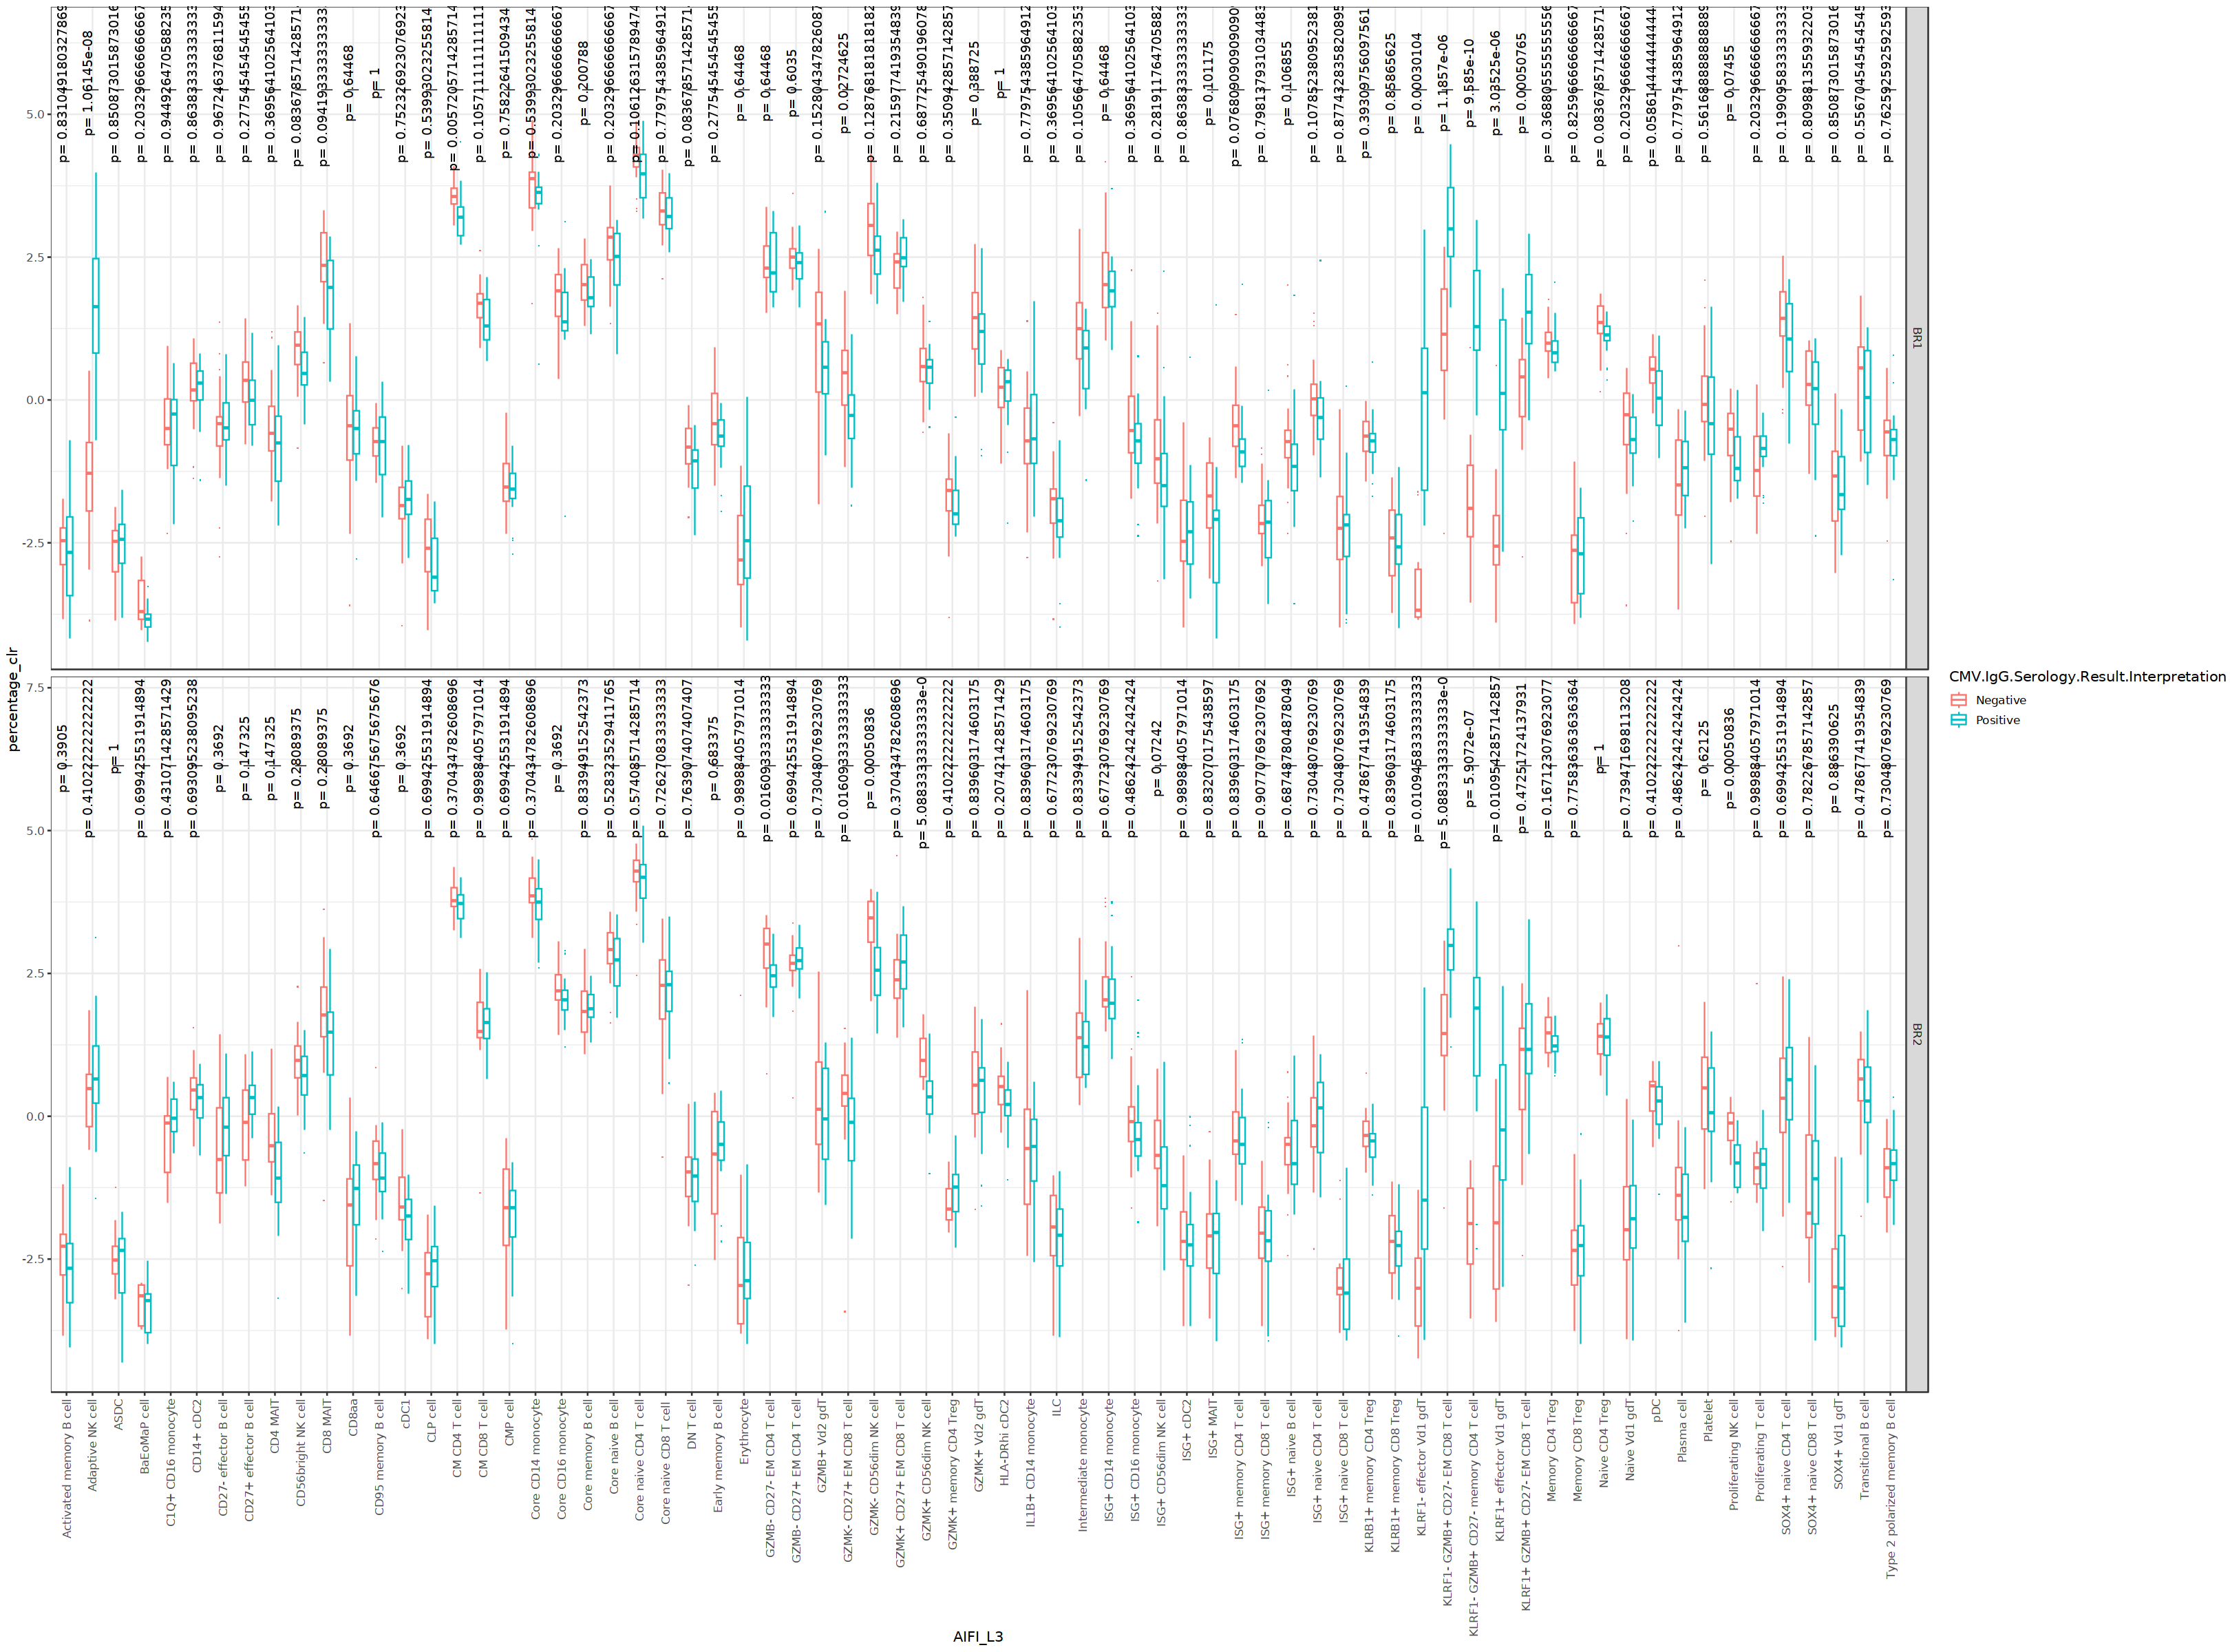

In [294]:
# Compute adjusted p-values for the table

#result_cohort <- result[result$cohort.cohortGuid == 'BR2', ]

stat_test_2 <- result %>%
  select(percentage_clr, AIFI_L3, CMV.IgG.Serology.Result.Interpretation, cohort.cohortGuid) %>%
  unique(.) %>%
  group_by(AIFI_L3, cohort.cohortGuid) %>%
  wilcox_test(percentage_clr ~ CMV.IgG.Serology.Result.Interpretation) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()


# Store adjusted p-values in a new column in the original dataframe
#result <- result %>%
 # left_join(stat_test_1, by = c("AIFI_L3", "cohort.cohortGuid"))

#only select one cohort at a time


# Create the plot
options(repr.plot.width = 27, repr.plot.height = 20)
p4 <- ggplot(result, aes(x = AIFI_L3, y = percentage_clr, color = CMV.IgG.Serology.Result.Interpretation)) +
  geom_boxplot(width = .5, outlier.shape = '.') +
  scale_x_discrete(name ="AIFI_L3", guide = guide_axis(angle = 90)) +
  theme_bw(base_size = 12) +
  geom_pwc(
    aes(group = CMV.IgG.Serology.Result.Interpretation),
    tip.length = 0, p.adjust.method = "BH", p.adjust.by = 'panel',
    method = "wilcox_test",label="p= {p.adj}", angle = 90, hide.ns = FALSE  # or "panel"
  ) +
  facet_grid(cohort.cohortGuid ~ ., scales = "free_y", space = "free_y") +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15))) 

# Display the plot
print(p4)


In [255]:
head(result)
#head(stat_test_1)

AIFI_L3 subject.subjectGuid count percentage percentage_clr cohort.cohortGuid
1 ASDC    BR1001              6     0.03236770 -2.232976      BR1              
2 ASDC    BR1002              5     0.02637409 -2.242500      BR1              
3 ASDC    BR1003              4     0.02094680 -2.763896      BR1              
4 ASDC    BR1004              3     0.01710571 -2.626914      BR1              
5 ASDC    BR1005              5     0.02809620 -1.943233      BR1              
6 ASDC    BR1006              4     0.02300966 -2.337902      BR1              
  subject.biologicalSex CMV.IgG.Serology.Result.Interpretation .y..x         
1 Female                Negative                               percentage_clr
2 Male                  Negative                               percentage_clr
3 Female                Negative                               percentage_clr
4 Male                  Negative                               percentage_clr
5 Female                Negative                               percentage_clr
6 Male                  Negative                               percentage_clr
  group1.x ⋯ p.adj.signif.y.y.y.y.y.y.y.y .y.            group1   group2   n1
1 Negative ⋯ ns                           percentage_clr Negative Positive 28
2 Negative ⋯ ns                           percentage_clr Negative Positive 28
3 Negative ⋯ ns                           percentage_clr Negative Positive 28
4 Negative ⋯ ns                           percentage_clr Negative Positive 28
5 Negative ⋯ ns                           percentage_clr Negative Positive 28
6 Negative ⋯ ns                           percentage_clr Negative Positive 28
  n2 statistic p     p.adj    p.adj.signif
1 17 224       0.755 0.850873 ns          
2 17 224       0.755 0.850873 ns          
3 17 224       0.755 0.850873 ns          
4 17 224       0.755 0.850873 ns          
5 17 224       0.755 0.850873 ns          
6 17 224       0.755 0.850873 ns

In [295]:
stat_test_2

.y.            group1   group2   n1   n2   statistic p    p.signif
W percentage_clr Negative Positive 3426 2891 4938606   0.85 ns

In [87]:
library(ggplot2)
library(ggpubr)
library(ggpval)

p4 <- ggplot(result, aes(x = AIFI_L3, y = percentage_clr, color = cohort.cohortGuid)) + 
  geom_boxplot(width = .5, outlier.shape = '.') + 
  scale_x_discrete(name = "AIFI_L3", guide = guide_axis(angle = 60)) + 
  theme_bw(base_size = 12) +
  theme(axis.text = element_text(size = 15), axis.title = element_text(size = 14)) +
  stat_signif(comparisons = list(c("BR1", "BR2")), test = "wilcox.test", method = "bonferroni", map_signif_level = TRUE) +
  facet_grid(CMV.IgG.Serology.Result.Interpretation ~ ., scales = "free_y", space = "free_y")

print(p4)


ERROR: Error in stat_signif(comparisons = list(c("BR1", "BR2")), test = "wilcox.test", : could not find function "stat_signif"


In [86]:
install.packages("ggpval")



Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
library(tidyverse)
library(coin)

options(repr.plot.width = 20, repr.plot.height = 15)

# Assuming percentage_clr is a valid variable in NK_df
p4 <- ggplot(NK_df, aes(x = AIFI_L3, y = percentage_clr, color = CMV.IgG.Serology.Result.Interpretation)) + 
  geom_boxplot(width = .5, outlier.shape = NA) + 
  theme_bw(base_size = 14) +
  theme(axis.text = element_text(size = 15), axis.title = element_text(size = 14)) +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15))) +
  facet_grid(cohort.cohortGuid ~ ., scales = "free_y", space = "free_y") +
  stat_pvalue_manual(stat.test, label = "wilcox.test.p = {p}")

p4


In [ ]:
result <- all_df_subset %>%
  dplyr::group_by(celltypes, subject.subjectGuid) %>%               
  dplyr::summarise(count = n()) %>%                  # Count occurrences
  dplyr::group_by(subject.subjectGuid) %>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(subject.subjectGuid) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% # Group again by subjectGuid for CLR# Calculate percentage
  dplyr::ungroup()

In [ ]:
result<-left_join(result,unique(all_df_subset[c('cohort.cohortGuid','subject.subjectGuid','subject.biologicalSex','CMV.IgG.Serology.Result.Interpretation')]),by=c('subject.subjectGuid'))
result<-result %>% filter(!celltypes=="gdT")

In [ ]:
#percentage
options(repr.plot.width = 18, repr.plot.height = 12)
stat.test <- result %>% select(percentage,celltypes,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(celltypes) %>%
  wilcox_test(percentage ~ cohort.cohortGuid)

max_values<-result %>%
  group_by(celltypes) %>%
  slice(which.max(percentage))%>% select(percentage) %>% pull()+1
stat.test$y.position<-max_values
ggplot(result , aes(cohort.cohortGuid, percentage,color=cohort.cohortGuid)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+scale_color_d3()+
facet_wrap(~celltypes,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

In [ ]:
#result %>% filter(subject.subjectGuid == "BR1001") %>% 
    #  pull() %>% 
     # sum()

In [ ]:
result <- myeloid_df %>%
  dplyr::group_by(AIFI_L3, subject.subjectGuid) %>%               
  dplyr::summarise(count = n()) 

head(result)
sum(result$count)

In [ ]:
result<- result %>%
  dplyr::group_by(subject.subjectGuid) %>%
  dplyr::mutate(percentage = (count / sum(count)) * 100)
  

sum(result$count)
head(result)

In [ ]:
subset_df <- myeloid_df[, c('AIFI_L1', 'AIFI_L3','subject.subjectGuid' )]

In [ ]:
head(subset_df)

In [ ]:
result_subset <- subset_df %>%
  dplyr::group_by(AIFI_L1, subject.subjectGuid) %>%               
  dplyr::summarise(count = n()) 

head(result_subset)
sum((result_subset$count))

In [ ]:
result_subset <- subset_df %>%
  dplyr::group_by(AIFI_L1, AIFI_L3,  subject.subjectGuid) %>%               
  dplyr::summarise(count = n()) 

head(result_subset)
sum((result_subset$count))

In [ ]:
#######TALLY METHOD

In [ ]:
tally_df <- tally(group_by(subset_df, AIFI_L1, AIFI_L3, subject.subjectGuid ))

In [ ]:
sum(tally_df$n)

In [ ]:
# Calculate the total number of cells
total_cells <- sum(tally_df$n)

# Calculate the percentage relative to the total number of cells
tally_df <- tally_df %>%
  mutate(percentage = (n / total_cells) * 100)

print(tally_df)
sum(tally_df$n)

In [ ]:
tally_df <- tally_df %>%
  group_by(AIFI_L1, AIFI_L3) %>%
  mutate(percentage = (n / sum(n)) * 100) %>%
  ungroup()

print(tally_df)

In [ ]:
tally_df_B_cell <- tally_df %>% filter(AIFI_L1 == 'B cell')

In [ ]:
tally_df_B_cell
sum(tally_df_B_cell$n)

In [ ]:
tally_df_B_cell <- tally_df_B_cell %>%
  group_by(AIFI_L1, AIFI_L3) %>%
  mutate(percentage = (n / sum(n)) * 100) %>%
  ungroup()

print(tally_df_B_cell)

In [ ]:
result_2 <- myeloid_df %>%
  dplyr::group_by(AIFI_L3, subject.subjectGuid) %>%               
  dplyr::summarise(count_AIFI_L3 = n()) 

head(result_2)

In [ ]:
merged_df <- left_join(result, result_2, by = "subject.subjectGuid", all = TRUE)

In [ ]:
head(merged_df)


In [ ]:
result<-left_join(result_2,unique(myeloid_df[c('cohort.cohortGuid','subject.subjectGuid','subject.biologicalSex','CMV.IgG.Serology.Result.Interpretation')]),by=c('subject.subjectGuid'))

In [ ]:
#kable(table(myeloid_df$AIFI_L1))
kable(table(myeloid_df$AIFI_L3))
#kable(table(subset_df$AIFI_L1))

In [ ]:
sum(table(myeloid_df$AIFI_L1))


In [ ]:
library("knitr")

In [ ]:
#debugging
result <- myeloid_df %>%
  dplyr::group_by(AIFI_L1, subject.subjectGuid) %>%               
  dplyr::summarise(AIFI_L1_count = n()) 
  #dplyr::mutate(percentage = (count / sum(count)) * 100)

#sum(result$count)
head(result)

In [ ]:
#for total PBMC
result <- myeloid_df %>%
  dplyr::group_by(AIFI_L3) %>%                        # Group by cell type
  dplyr::summarise(count = n()) %>%                  # Count occurrences for each cell type
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::ungroup() %>%
  dplyr::mutate(percentage_clr = clr_transform(percentage)) # Apply CLR transformation

head(result)

In [ ]:
#of parent cell type (AIFI_L1)
result_cell_types_within_parent <- myeloid_df %>%
  dplyr::group_by(AIFI_L1, AIFI_L3) %>%               # Group by parent cell type and cell type
  dplyr::summarise(count = n()) %>%                  # Count occurrences for each cell type within its parent
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(AIFI_L1) %>%                       
  dplyr::mutate(percentage_clr = clr_transform(percentage)) %>% # Apply CLR transformation
  dplyr::ungroup()


In [ ]:
####Loop code to consider the parent types 

In [ ]:
result

In [ ]:
result<-left_join(result,unique(myeloid_df[c('cohort.cohortGuid','subject.subjectGuid','subject.biologicalSex','CMV.IgG.Serology.Result.Interpretation')]),by=c('subject.subjectGuid'))

In [ ]:
head(result)
unique(result$cohort.cohortGuid)

In [ ]:
results <- myeloid_df %>%
     dplyr::group_by(AIFI_L1, AIFI_L3, subject.subjectGuid ) %>% 
    dplyr::count(AIFI_L1 )
    
head(results)

In [ ]:
rownames(stat.test)

In [ ]:
########Stat test (Wilcoxon) and Boxplot

In [ ]:
stat.test <- result %>% select(percentage_clr,AIFI_L3,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  wilcox_test(percentage_clr ~ CMV.IgG.Serology.Result.Interpretation)



In [ ]:
head(stat.test)

In [ ]:
ggsave("/home/jupyter/Myeloid_cells/Plots/AIFI_L3_CMVcompare_allCohorts_percentage_clr.png", plot = my_plot, width = 15, height = 49, units = "in", dpi = 300)

In [ ]:
##percentage comparsion by CMV 

options(repr.plot.width = 20, repr.plot.height = 100)

stat.test <- result %>% select(percentage,AIFI_L3,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid)%>%
    unique(.)%>% 
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  wilcox_test(percentage ~ CMV.IgG.Serology.Result.Interpretation)


max_values<-result %>%
  group_by(AIFI_L3,cohort.cohortGuid) %>%
  slice(which.max(percentage))%>% select(percentage) %>% pull()+1


stat.test$y.position<-max_values


my_plot <- ggplot(result, aes(CMV.IgG.Serology.Result.Interpretation, percentage,color=CMV.IgG.Serology.Result.Interpretation)) + 
    geom_boxplot(width = .2, outlier.shape = NA) + 
    geom_jitter(width = .05, alpha = .5)+
    theme_bw(base_size=14)+
facet_wrap(~cohort.cohortGuid+AIFI_L3,scale="free",ncol=5)+ stat_pvalue_manual(stat.test,label = "wilcox.test.p = {p}")+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15)))

my_plot